# Date reading & Variables Classification

In [2]:
train = pd.read_csv('dss-regression-datasets/project-sberbank-housing-market-data/train.csv')
var_dep = train[['price_doc', 'id', 'timestamp']]
var_ind_cat = pd.read_csv('cat_var_enc.csv').drop(['Unnamed: 0'], axis=1)
useless_var = pd.read_csv('useless_var.csv')
var_ind_num = train.drop([*var_dep.columns, *var_ind_cat.columns, *useless_var.values.flatten()], axis=1)

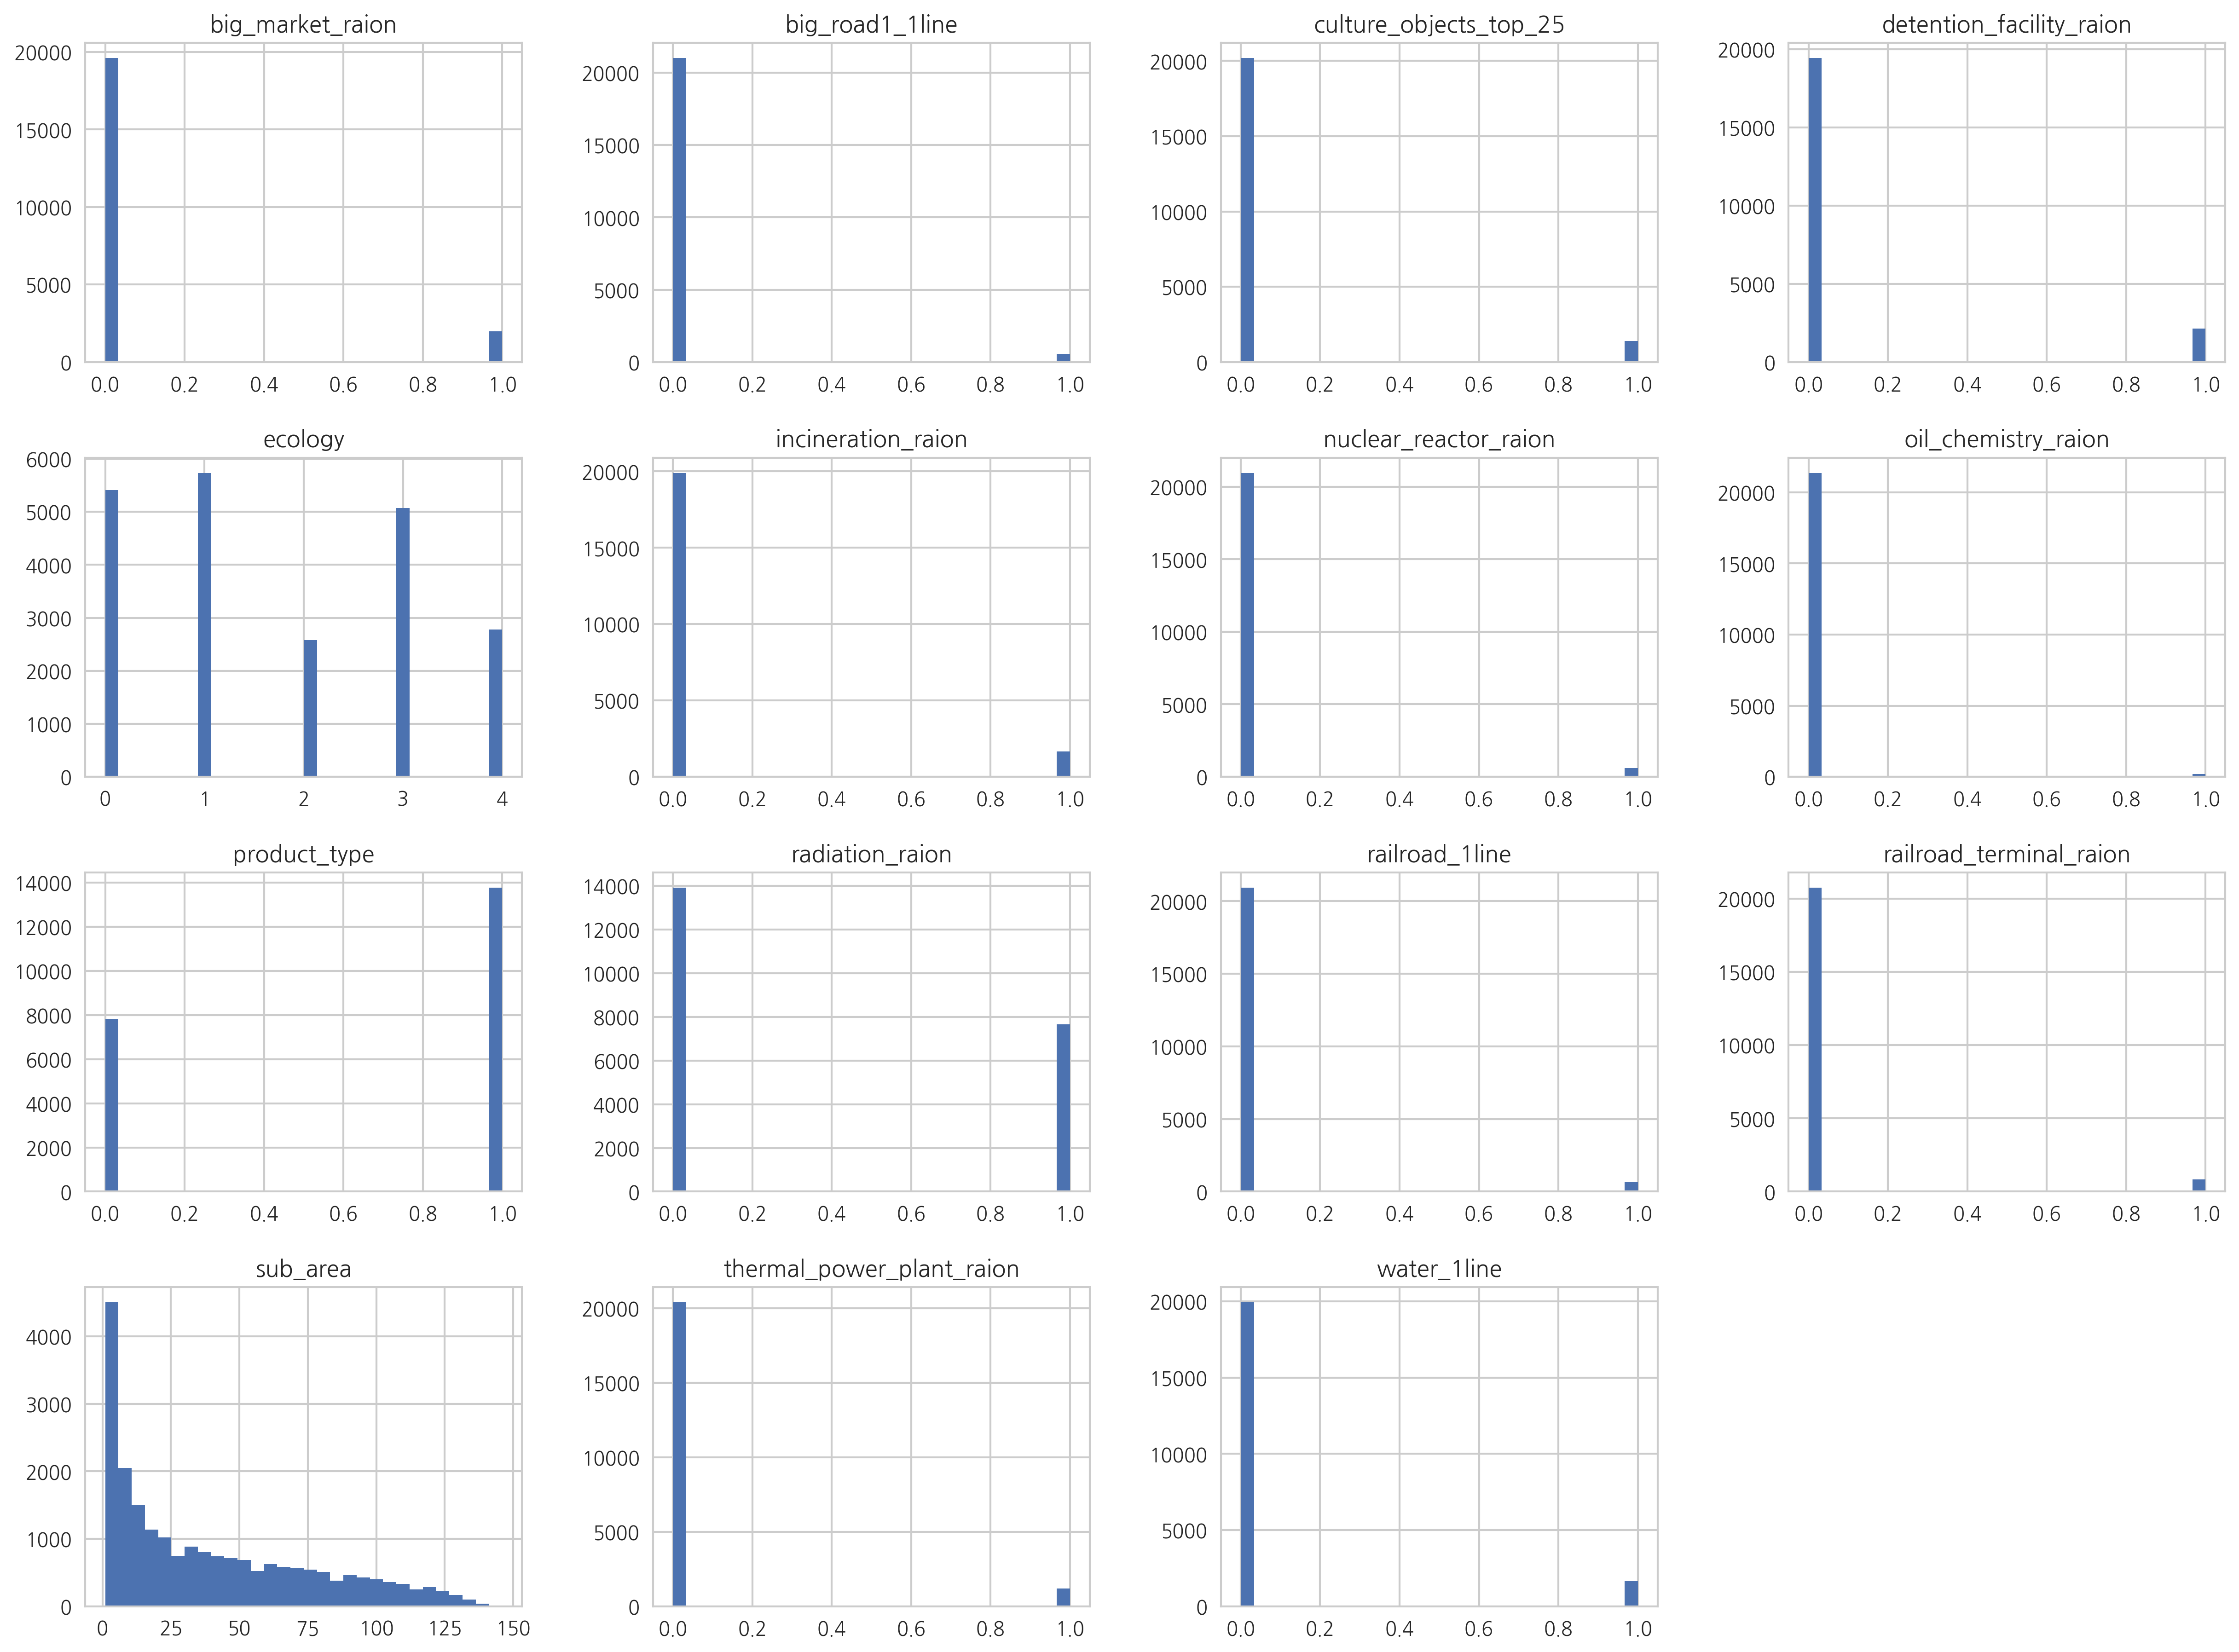

In [17]:
var_ind_cat.hist(bins=30, figsize=(20,15))
plt.show()

# Seaborn Pairplot of Cat Var

In [18]:
var_ind_cat.columns

Index(['product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [2]:
eda_cat_plus_dep = pd.concat([var_dep['price_doc'], var_ind_cat], axis=1)

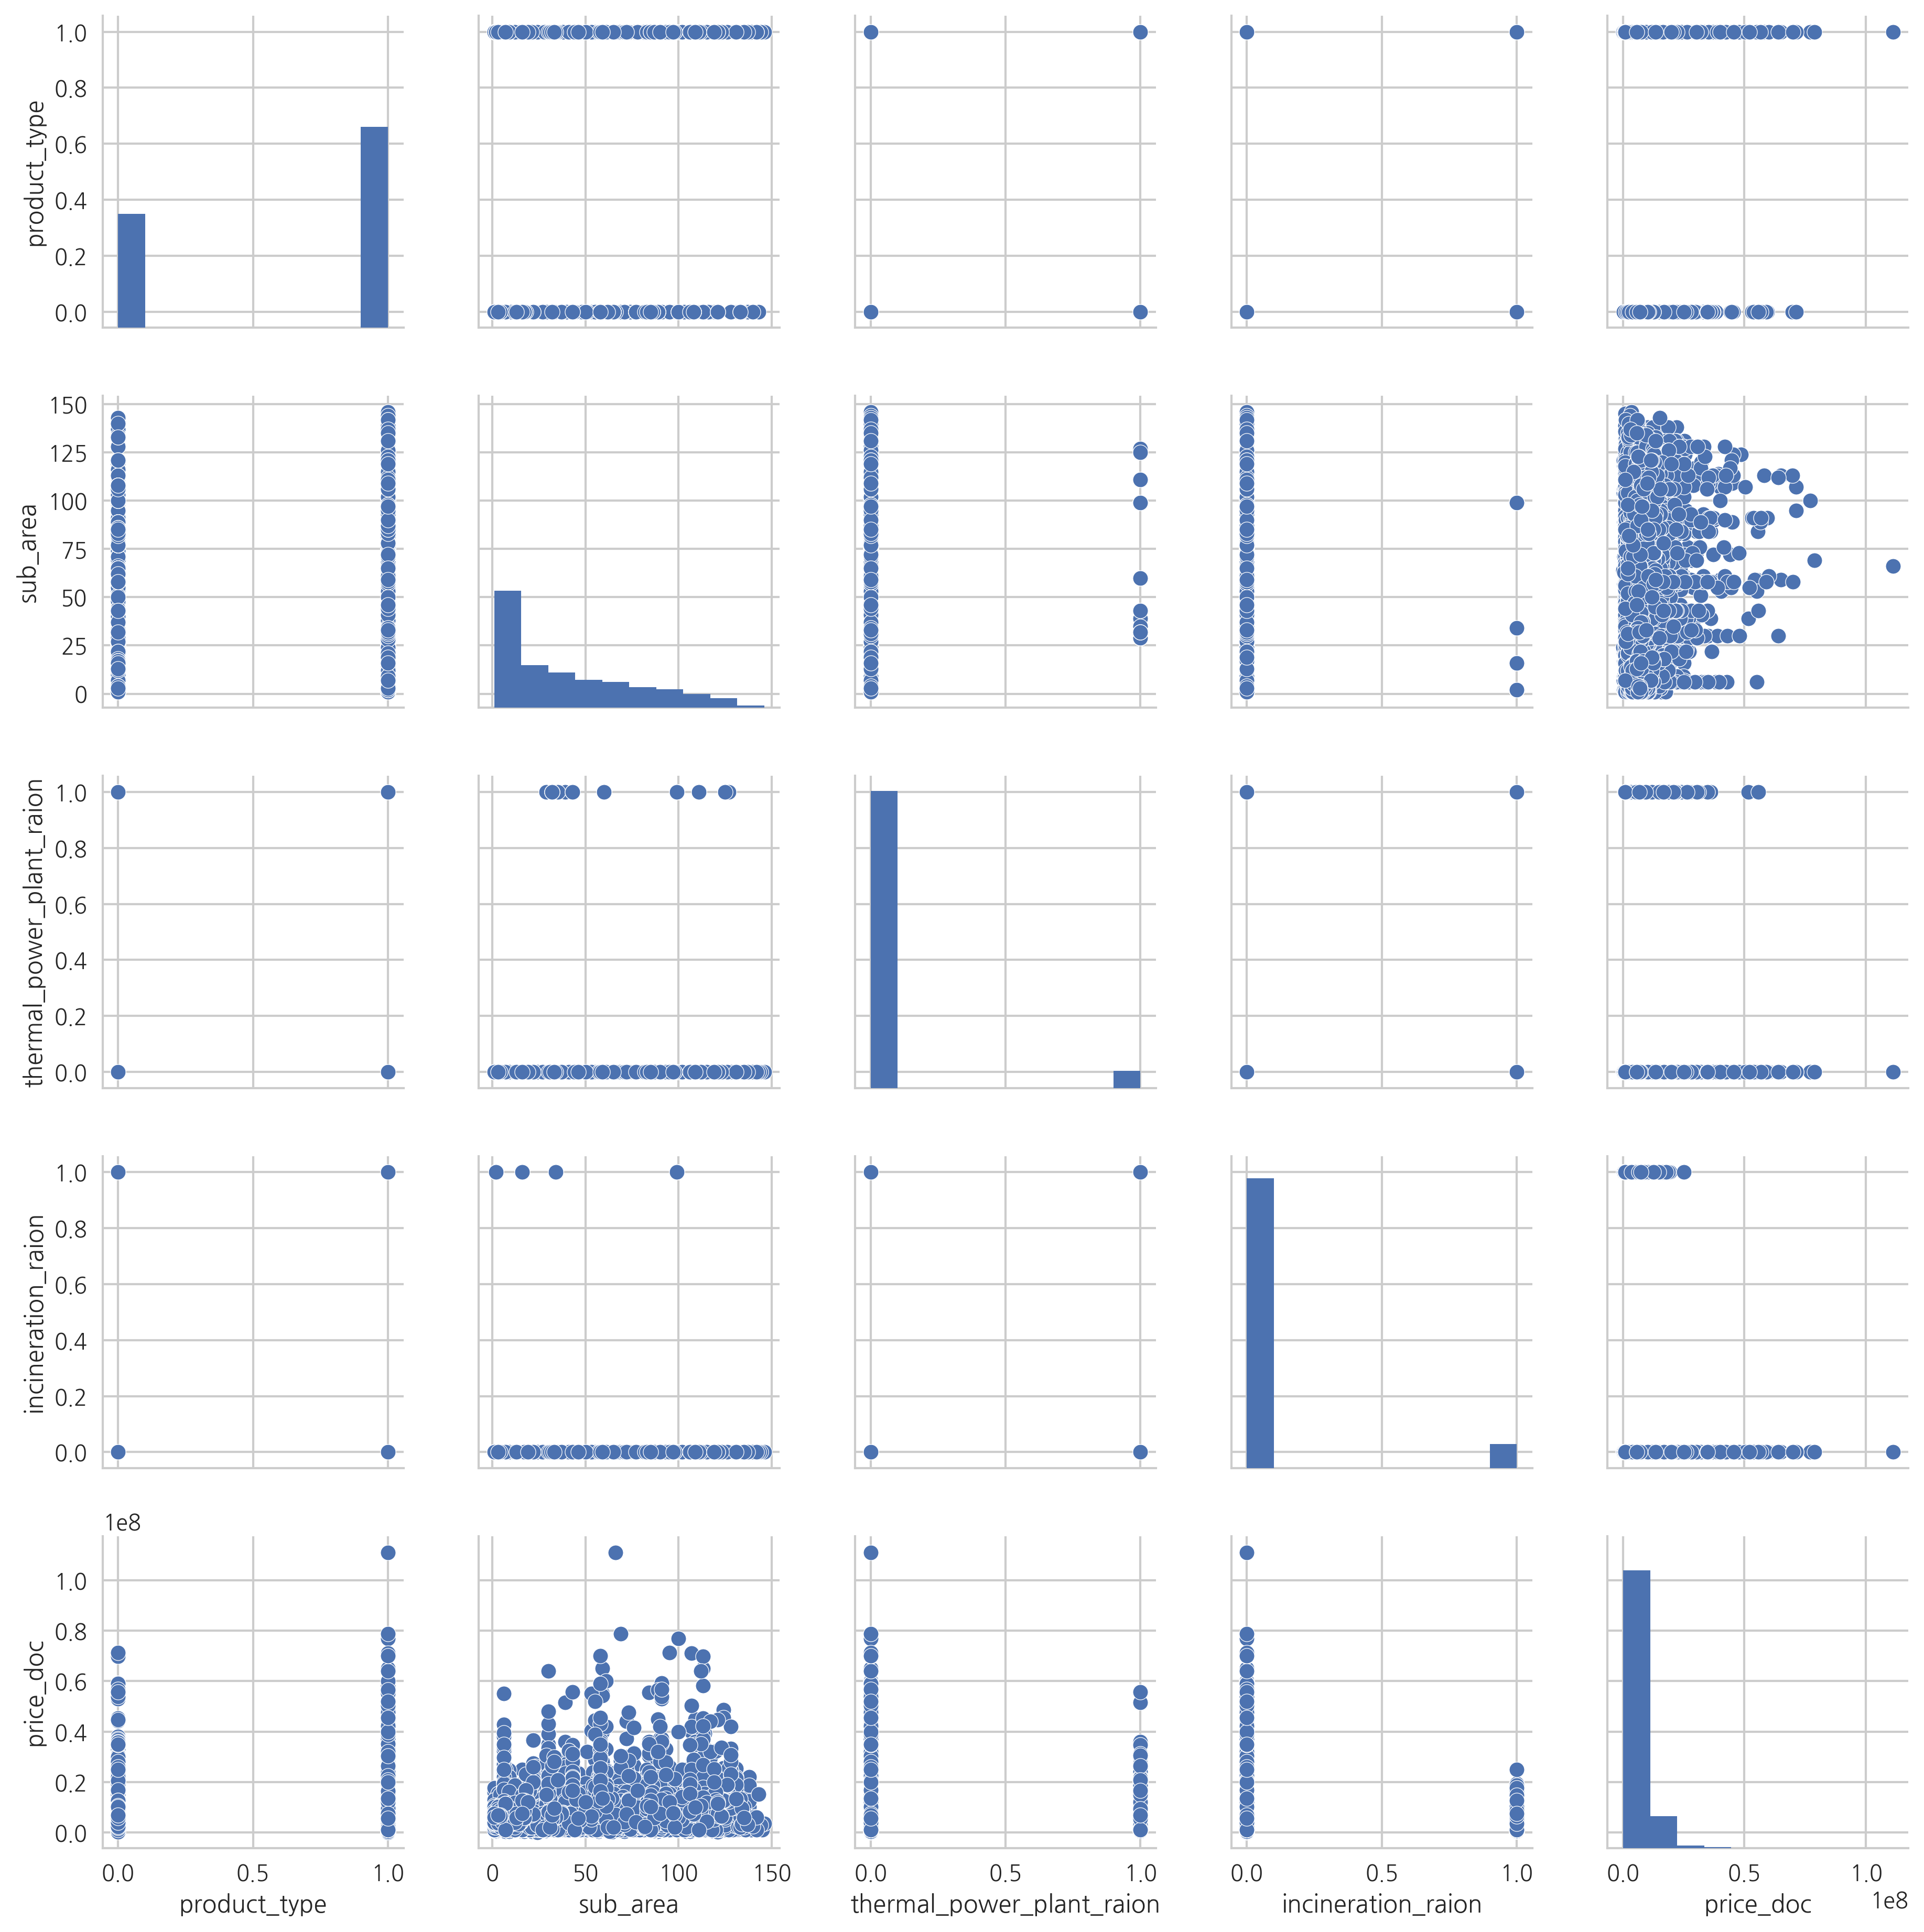

In [3]:
cols = ["product_type", "sub_area", "thermal_power_plant_raion", "incineration_raion", "price_doc"]
sns.pairplot(eda_cat_plus_dep[cols])
plt.show()

In [21]:
var_ind_num.columns

Index(['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year',
       'num_room', 'kitch_sq', 'state', 'area_m',
       ...
       'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500',
       'cafe_count_5000_price_4000', 'cafe_count_5000_price_high',
       'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
       'leisure_count_5000', 'sport_count_5000', 'market_count_5000'],
      dtype='object', length=265)

# Seaborn Pairplot of Num Var

In [5]:
num_plus_dep = pd.concat([var_dep['price_doc'], var_ind_num], axis=1)
cols = ['full_sq', 'life_sq', 'num_room', 'sport_count_5000', 'price_doc']
num_plus_dep[cols].isnull().sum()

full_sq                0
life_sq             4539
num_room            6773
sport_count_5000       0
price_doc              0
dtype: int64

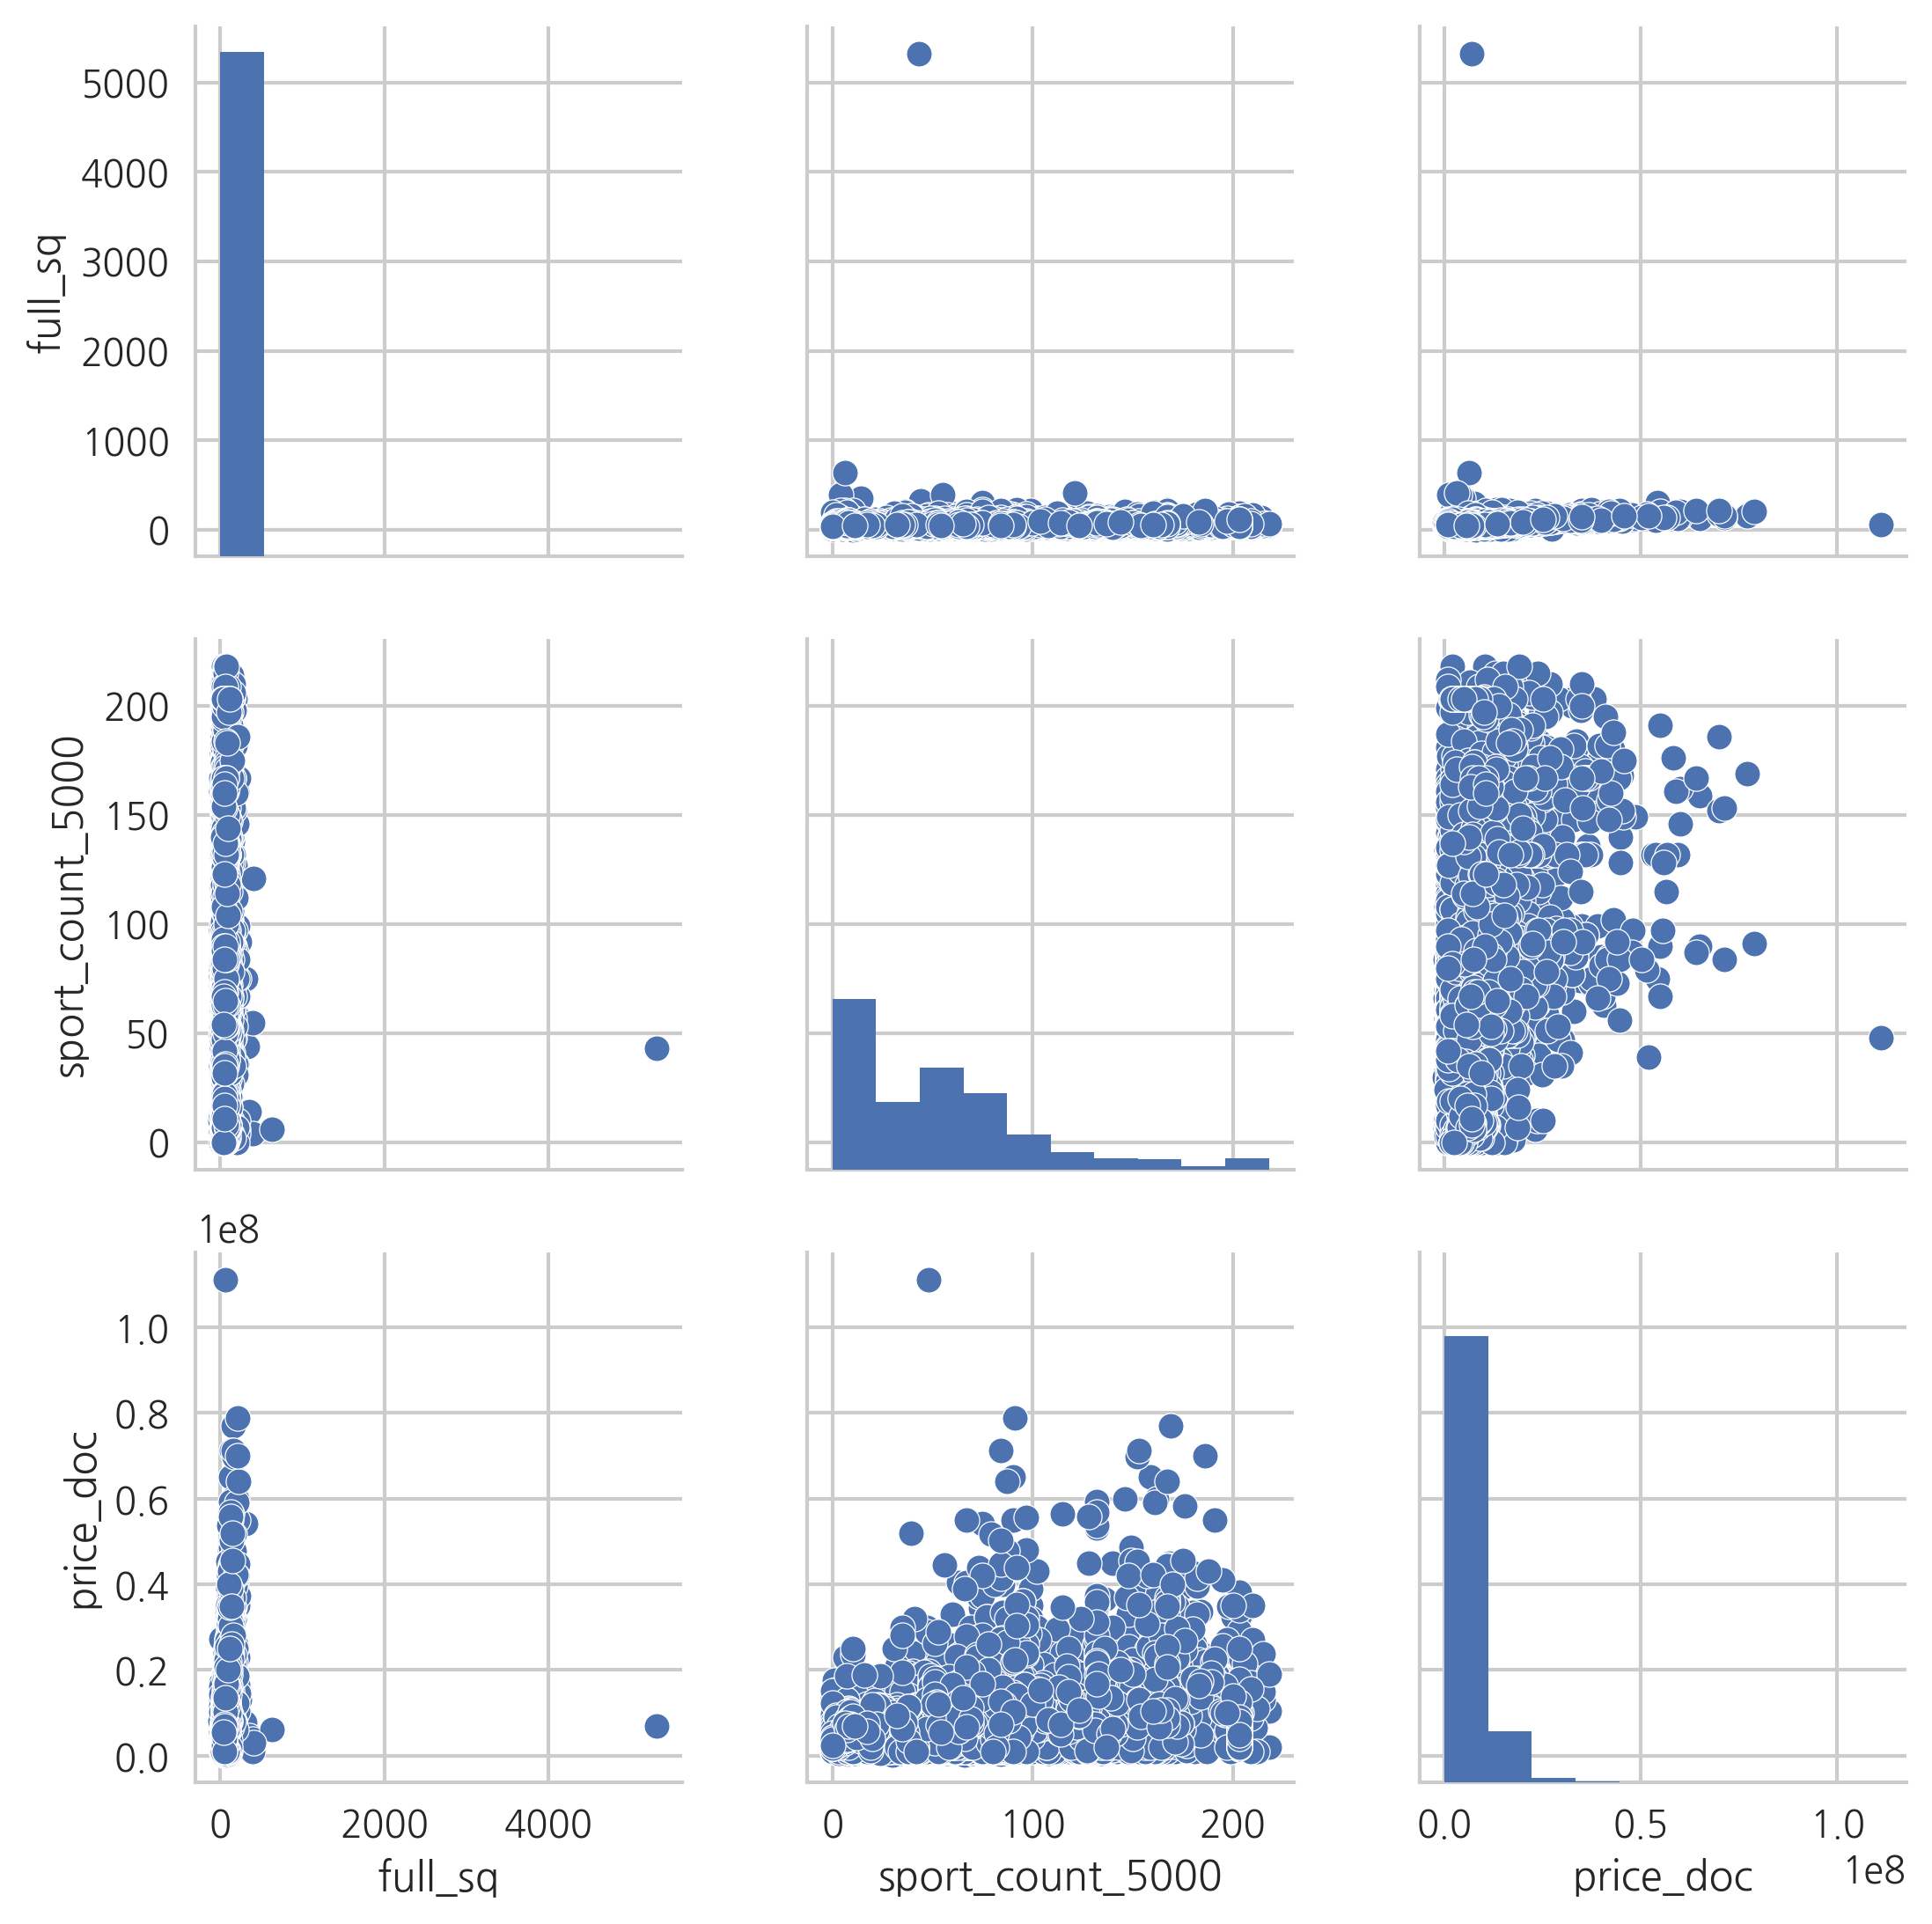

In [6]:
num_plus_dep = pd.concat([var_dep['price_doc'], var_ind_num], axis=1)
cols = ['full_sq', 'sport_count_5000', 'price_doc']
sns.pairplot(num_plus_dep[cols])
plt.show()

# Full Regression for Pre-data handling
By just remove any rows that have a 'null value', using OLS and Stats model

## .dropna(how='any') : remove any row that have more that 1 null value

# then, only 4245 rows remain

In [6]:
num_plus_dep_nulldrop = num_plus_dep.dropna(how='any')
num_plus_dep_nulldrop.shape

(4245, 266)

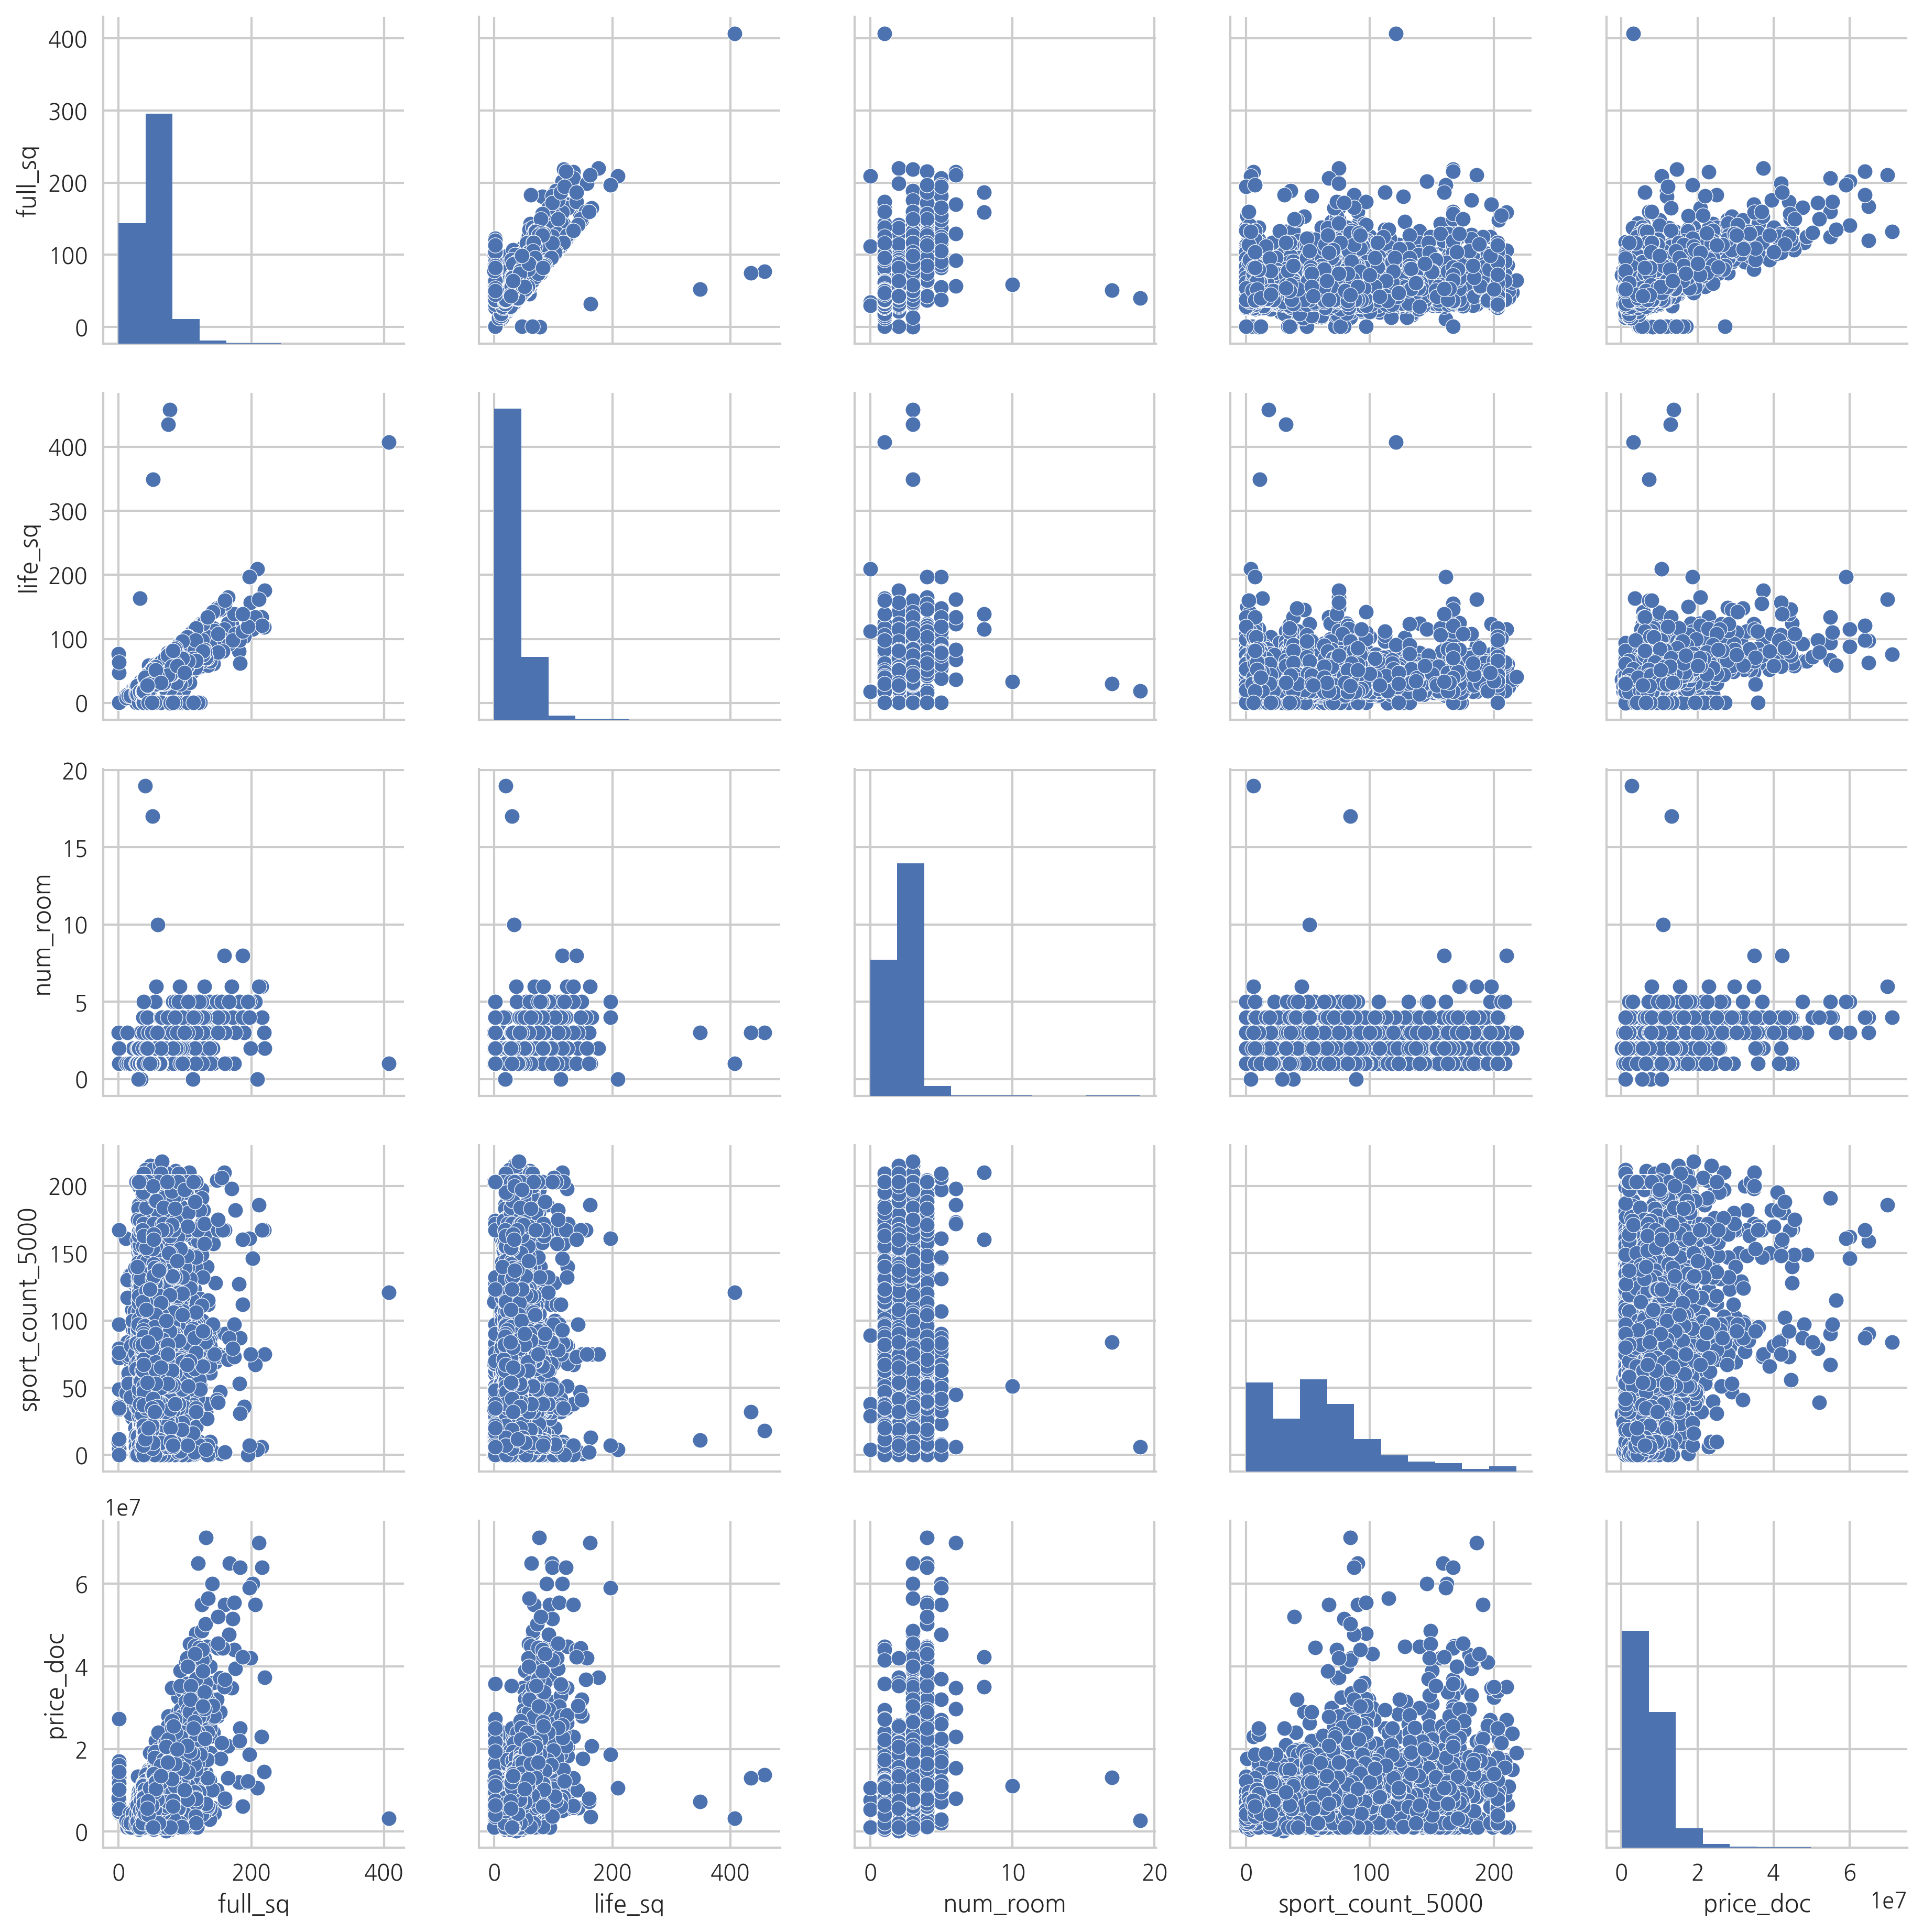

In [8]:
cols = ['full_sq', 'life_sq', 'num_room', 'sport_count_5000', 'price_doc']
main_var = num_plus_dep[cols]
main_var_nulldrop = main_var.dropna(how='any')
sns.pairplot(main_var_nulldrop[cols])
plt.show()

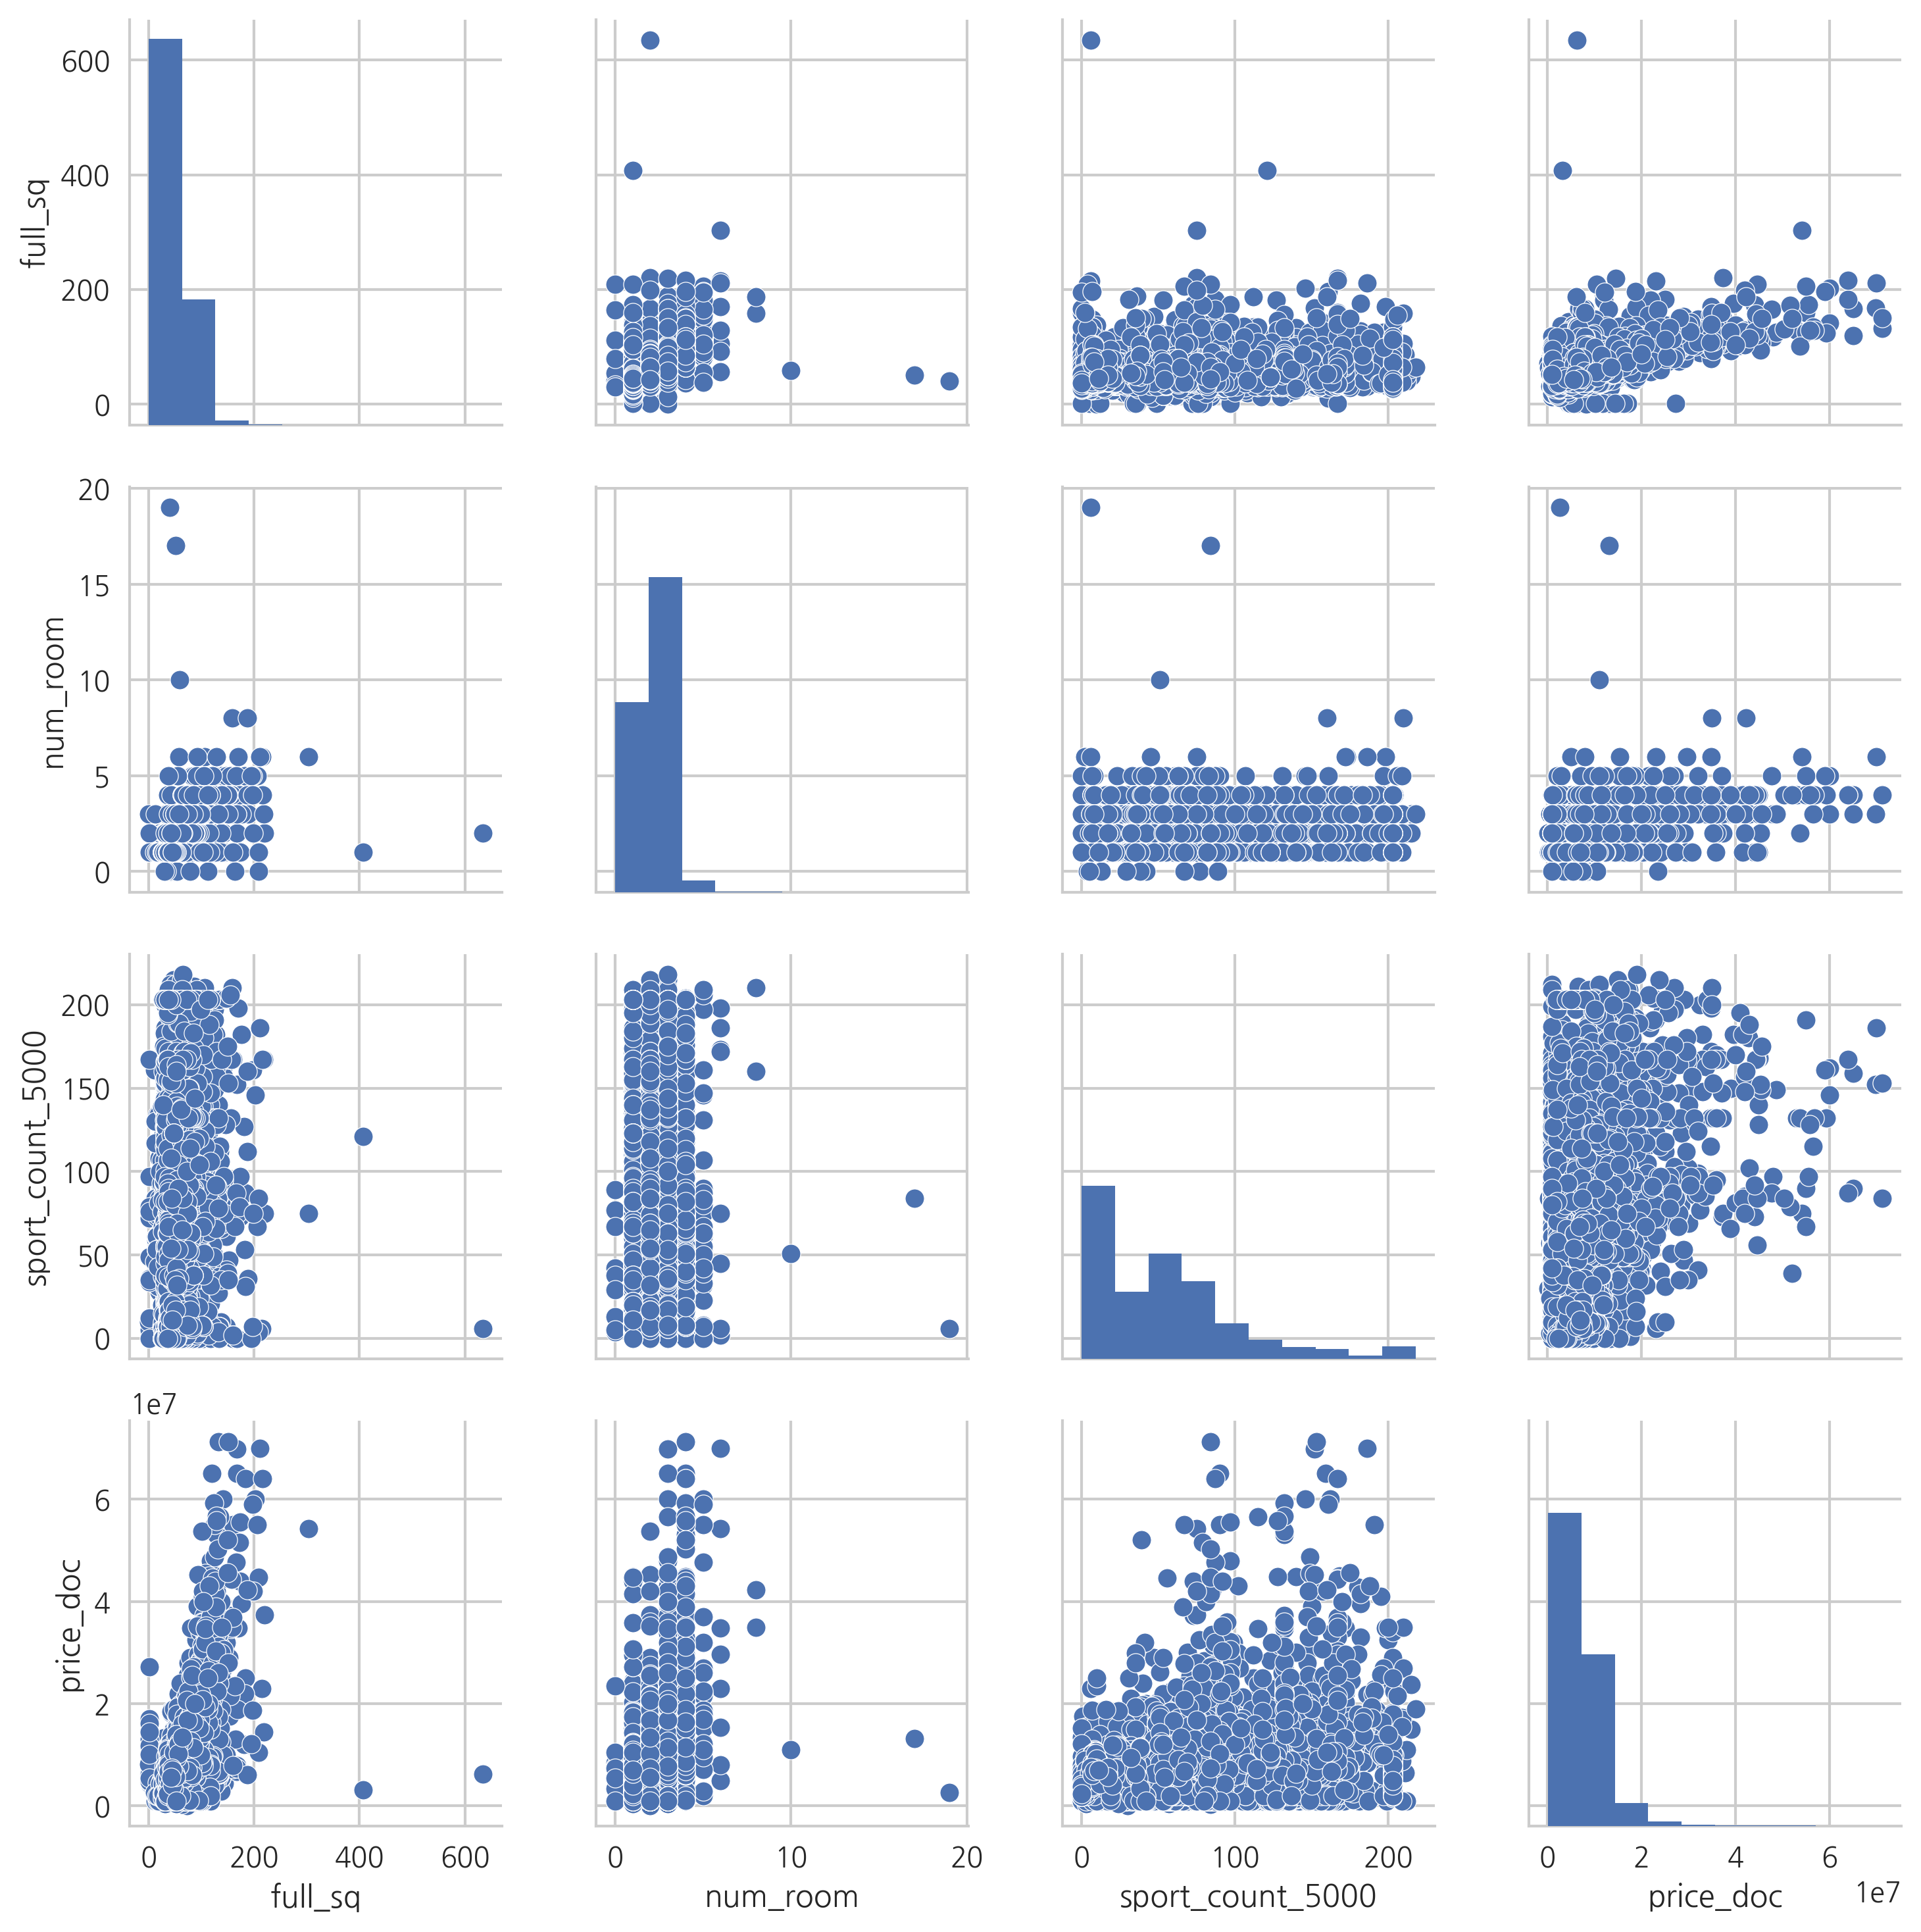

In [7]:
cols = ['full_sq', 'num_room', 'sport_count_5000', 'price_doc']
main_var = num_plus_dep[cols]
main_var_nulldrop = main_var.dropna(how='any')
sns.pairplot(main_var_nulldrop[cols])
plt.show()

# With Scikit Learn Linear Regression

In [9]:
from sklearn.datasets import make_regression

In [10]:
target_dfxy = num_plus_dep.dropna(how='any')
dfy = target_dfxy['price_doc']
dfx = target_dfxy.drop('price_doc', axis=1)
dfxc = sm.add_constant(dfx)
w = np.dot(np.dot(np.linalg.inv(np.dot(dfxc.T, dfxc)), dfxc.T), dfy)
w

array([ -3.44910741e+12,  -1.34535260e+11,   8.32007818e+10,
         1.49024619e+11,   2.49246117e+10,   3.36815314e+11,
         8.97191202e+04,   2.30437795e+12,   2.09484901e+11,
         2.06170428e+09,   2.33093769e+02,   1.35624925e+14,
         1.21596627e+12,  -9.20076924e+11,   4.03430076e+16,
         2.86524200e+10,   6.39194745e+19,   3.72308410e+08,
        -4.27521703e+08,  -2.10149421e+04,   9.10922480e+07,
        -1.46771176e+08,  -9.69594730e+06,   1.41185677e+07,
        -3.55126238e+07,   6.99649706e+07,  -9.26173943e+06,
        -5.04051165e+14,   5.04051165e+14,   5.04051165e+14,
         2.25213312e+15,  -2.38775804e+15,  -2.38775804e+15,
        -2.06362606e+14,   7.07376875e+13,   7.07376875e+13,
         5.41206474e+15,  -5.54768966e+15,  -5.54768966e+15,
        -1.52593891e+16,  -2.50836187e+16,  -2.50836187e+16,
        -6.39143855e+19,  -5.08900833e+15,  -5.08900832e+15,
         2.03618502e+15,  -2.03618502e+15,  -2.03618502e+15,
         8.66002474e+14,

In [8]:
w = np.linalg.lstsq(dfxc, dfy)[0]
w

array([ -6.27901602e+06,   1.89028562e+05,  -2.18050567e+04,
         9.49962987e+04,  -2.33769831e+04,   1.45792926e+04,
        -8.69866762e-01,  -2.49128556e+05,   5.87249091e+04,
         5.17398699e+05,  -7.33073750e-02,  -1.01378612e+03,
        -1.52818999e+06,   1.67826245e+06,   6.77487632e+03,
        -5.67219291e+03,   6.75544929e+03,   2.37422701e+05,
        -1.35159700e+06,   3.87258200e+02,  -1.77506088e+04,
         3.26293143e+05,  -5.36686397e+04,  -9.66655219e+04,
         4.02332975e+05,  -1.85507029e+04,  -4.89574910e+04,
         1.38290237e+01,  -3.14213826e+01,   4.20228805e+01,
        -2.43826167e+03,  -5.36164625e+03,   2.92338834e+03,
         6.11731327e+02,   4.92296848e+02,   1.19497318e+02,
         8.12661613e+02,   4.99722478e+02,   3.12920638e+02,
         6.77485537e+03,   1.32970193e+04,  -6.52215668e+03,
         6.75557192e+03,   8.12781965e+03,  -1.37225539e+03,
        -4.38398412e+02,  -1.15034557e+02,  -3.23369403e+02,
        -7.35283268e+01,

In [37]:
from sklearn import datasets, linear_model
model = linear_model.LinearRegression(fit_intercept=True)
model = model.fit(dfx, dfy)

In [38]:
print(model.coef_)
print(model.intercept_)

[  1.89028562e+05  -2.18050567e+04   9.49962987e+04  -2.33769831e+04
   1.45792930e+04  -8.69866764e-01  -2.49128557e+05   5.87249091e+04
   5.17398699e+05  -7.33073751e-02  -1.01391200e+03  -1.52818999e+06
   1.67826245e+06   6.77478562e+03  -5.67219268e+03   6.75562267e+03
   2.37422701e+05  -1.35159700e+06   3.87258200e+02  -1.77506085e+04
   3.26293143e+05  -5.36686398e+04  -9.66655220e+04   4.02332975e+05
  -1.85507027e+04  -4.89574910e+04   1.26756068e+01  -3.02679656e+01
   4.31762974e+01  -2.43817339e+03  -5.36160866e+03   2.92342595e+03
   6.11838026e+02   4.92316024e+02   1.19516494e+02   8.12738729e+02
   4.99771238e+02   3.12969398e+02   6.77491805e+03   1.32970473e+04
  -6.52212868e+03   6.75545258e+03   8.12776561e+03  -1.37230943e+03
  -4.38402887e+02  -1.15030081e+02  -3.23364934e+02  -7.35220775e+01
  -1.53142223e+02   7.96180224e+01  -7.78291259e+03  -8.38210841e+03
   5.99198301e+02   1.54855689e+05  -1.99545375e+04   6.69646955e+03
   1.83715737e+04   4.48780768e+04

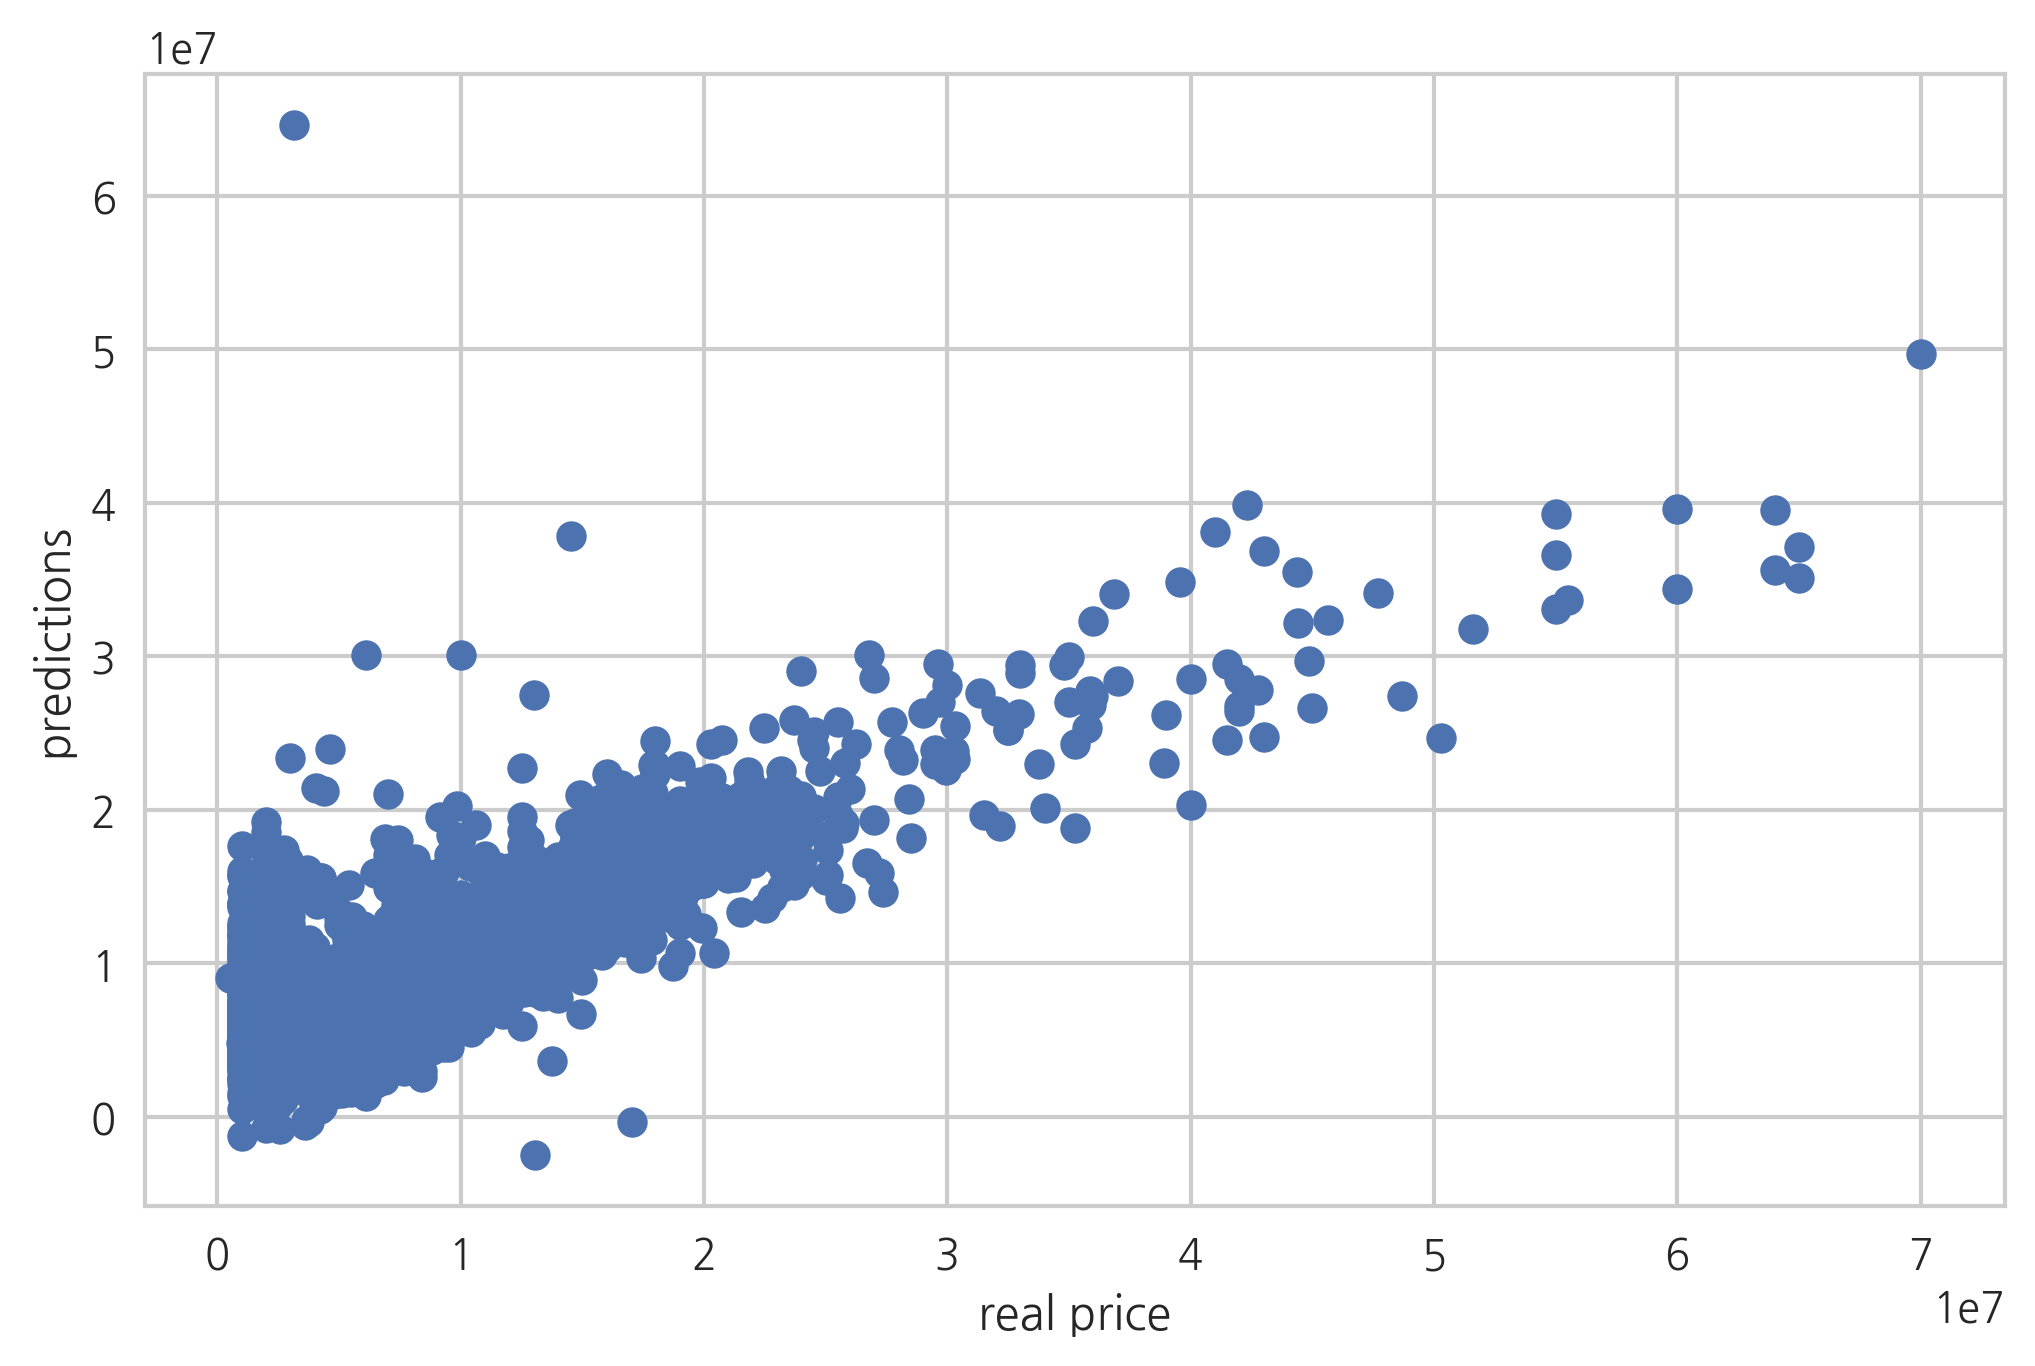

In [39]:
predictions = model.predict(dfx)

plt.scatter(dfy, predictions)
plt.xlabel("real price")
plt.ylabel("predictions")
plt.show()

# With Statsmodel OLS

In [3]:
import statsmodels.api as sm
model = sm.OLS(dfy, dfxc)
result = model.fit()
print(result.summary())

NameError: name 'dfy' is not defined

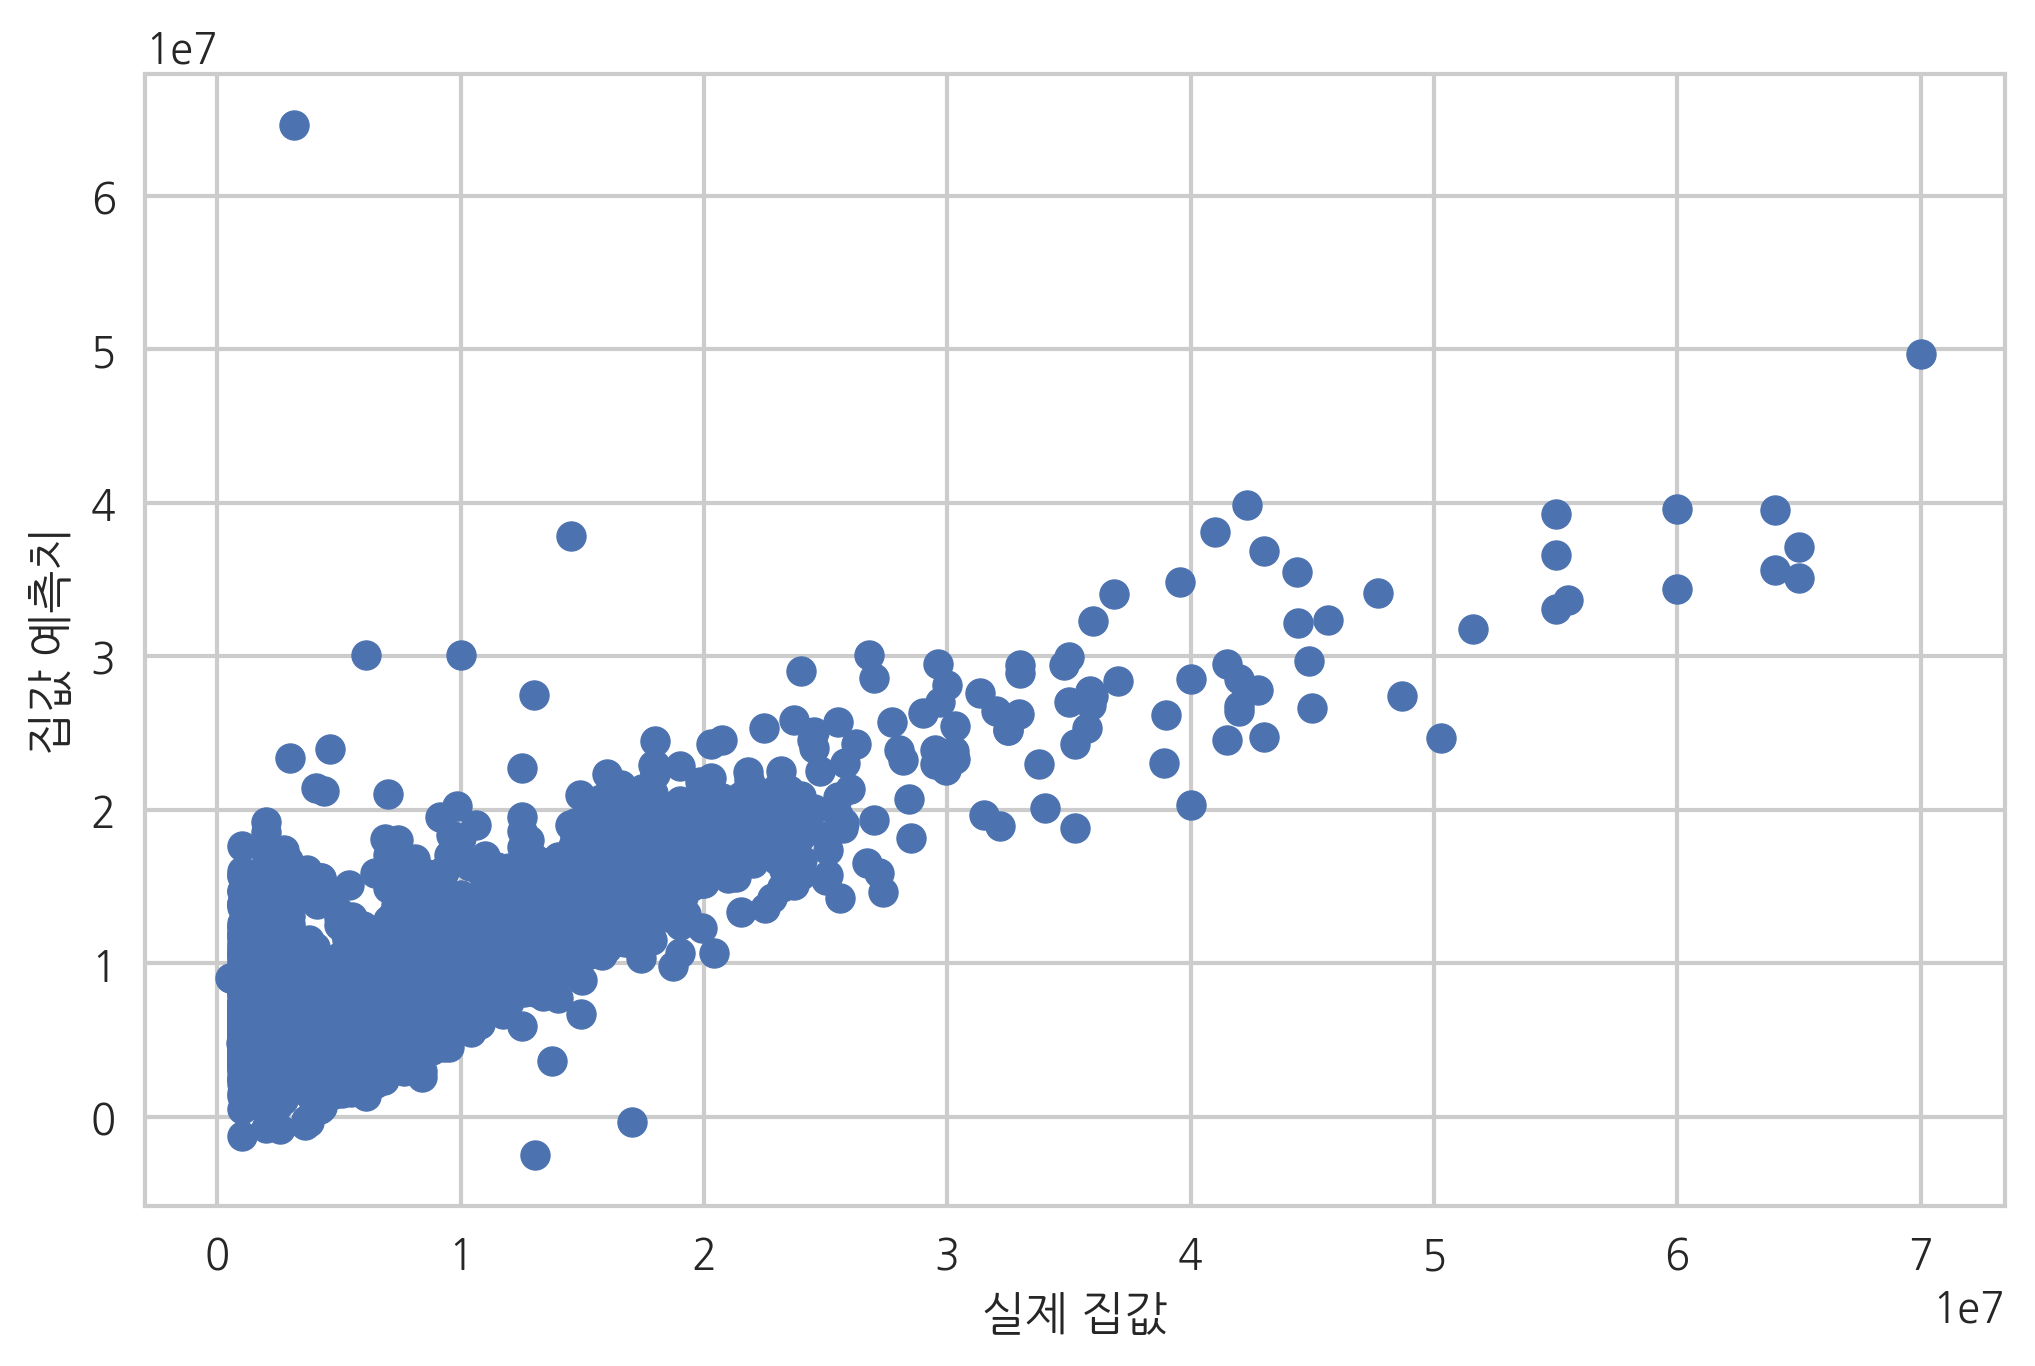

In [10]:
dfy_new = result.predict(dfxc)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

# P Values of Variable, 

In [42]:
result.pvalues.sort_values(ascending=False)

trc_count_1500                        9.870070e-01
preschool_education_centers_raion     9.825946e-01
market_count_500                      9.764170e-01
cafe_count_5000_price_1500            9.758726e-01
trc_sqm_1500                          9.750644e-01
0_17_male                             9.677108e-01
cafe_count_500_price_2500             9.650335e-01
prom_part_1000                        9.621098e-01
trc_count_1000                        9.553162e-01
0_13_female                           9.529567e-01
cafe_count_3000_price_1500            9.246553e-01
cafe_count_500_price_1000             9.222608e-01
healthcare_centers_raion              9.092693e-01
0_17_female                           9.065071e-01
cafe_count_500_price_500              8.959724e-01
7_14_female                           8.900759e-01
catering_km                           8.847907e-01
church_count_1500                     8.813945e-01
additional_education_km               8.790205e-01
sport_count_2000               

In [43]:
len(result.params)`

266

# Reverage and Influence, outliers Analysis

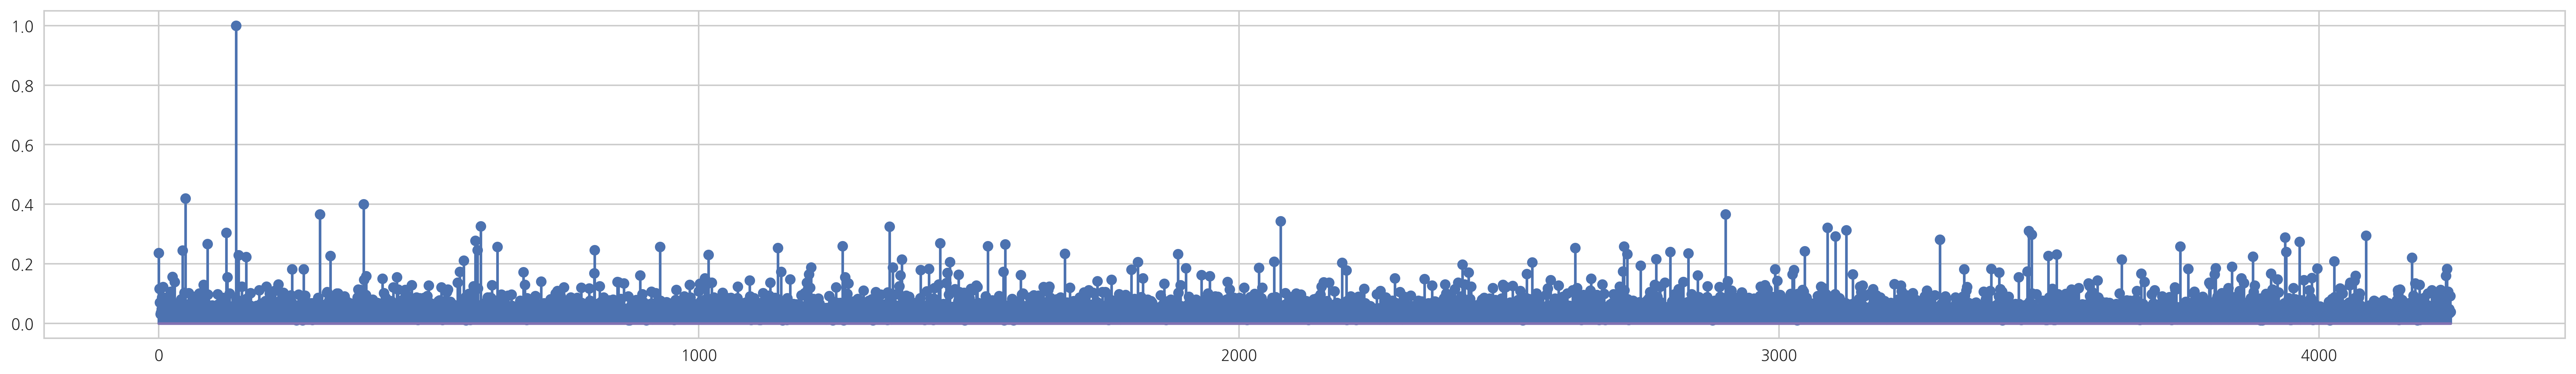

In [44]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(30, 4))
plt.stem(hat)
plt.show()

In [45]:
dfxc.shape

(4245, 266)

In [46]:
print("hat.sum() =", hat.sum())

hat.sum() = 244.999999999


In [1]:
267/4245

0.06289752650176679

# High influence value - row : 341 rows

In [47]:
idx = hat > 0.1
influencerow = dfx[idx]
influencerow

full_sq  life_sq  floor  max_floor  material  build_year  num_room  \
5696        11     11.0    2.0        5.0       2.0      1907.0       1.0   
5864        77     50.0    3.0        5.0       2.0      1957.0       3.0   
6024        56     38.0    2.0        9.0       1.0      1971.0       3.0   
6229        55     40.0    4.0        5.0       2.0      1958.0       3.0   
6284        44     30.0    5.0        5.0       1.0      1961.0       2.0   
6309        59     35.0    6.0        9.0       2.0      1946.0       2.0   
6476        83     42.0    8.0        3.0       2.0      1961.0       3.0   
6505        40     16.0    8.0       12.0       2.0      1974.0       1.0   
6539        77    458.0   12.0       16.0       1.0      1996.0       3.0   
6615        95     50.0    8.0       17.0       2.0      2003.0       3.0   
6792        34     20.0    2.0        9.0       2.0      1974.0       2.0   
6848        82     60.0    2.0        9.0       2.0      1938.0       3.0   
6849        31     18.0    2.0        1.0       1.0      1950.0       2.0   
6880        60     38.0    8.0        8.0       2.0      1939.0       2.0   
7043        43     29.0    3.0        5.0       2.0      1962.0       2.0   
7054        86     66.0    5.0        6.0       2.0      1935.0       4.0   
7066        31     17.0    4.0        8.0       5.0      1962.0       1.0   
7134        37     16.0    8.0       12.0       1.0  20052009.0       1.0   
7142        46     28.0    8.0        9.0       1.0      1976.0       2.0   
7171        81     57.0    7.0       23.0       4.0      2008.0       1.0   
7231        45     28.0    5.0       17.0       1.0      1967.0       2.0   
7277       133    124.0    8.0       25.0       2.0      2011.0       1.0   
7352        56     40.0    3.0        9.0       2.0      1965.0       3.0   
7388        37     22.0    6.0        9.0       5.0      1962.0       2.0   
7409        32     18.0    2.0        9.0       1.0      1970.0       1.0   
7438        37     22.0    9.0        9.0       1.0      1967.0       2.0   
7467       118     57.0    6.0       18.0       6.0      2012.0       3.0   
7496        47     29.0    7.0        8.0       2.0      1961.0       2.0   
7536        87     56.0    7.0        9.0       2.0      1963.0       4.0   
7610       102     49.0    2.0        6.0       2.0      1987.0       4.0   
...        ...      ...    ...        ...       ...         ...       ...   
20399       80     44.0    2.0        5.0       2.0      1905.0       3.0   
20406       38     23.0    1.0        5.0       2.0      1960.0       2.0   
20452       53     30.0    4.0       16.0       1.0      1983.0       2.0   
20506      115     86.0    2.0        4.0       2.0      1917.0       4.0   
20534       57     31.0    4.0       10.0       2.0      1959.0       2.0   
20565       29     17.0    7.0       12.0       2.0      1964.0       1.0   
20575       33     18.0    7.0        8.0       2.0      1962.0       1.0   
20597       36     22.0    9.0        9.0       5.0      1963.0       2.0   
20726       37     19.0    5.0        6.0       2.0      1915.0       1.0   
20780       54     36.0    4.0        9.0       2.0      1961.0       3.0   
20786       41     24.0    3.0        9.0       2.0      1967.0       2.0   
20795       96     50.0   12.0       17.0       4.0      2003.0       3.0   
20857       48     31.0    5.0       12.0       1.0      1969.0       2.0   
20858       65     43.0    5.0        5.0       2.0      1926.0       3.0   
20885       64     64.0    5.0        8.0       2.0      1915.0       2.0   
20892      187    139.0    3.0        6.0       2.0      1886.0       8.0   
20918       55     33.0    3.0        9.0       2.0      1960.0       2.0   
20992      211    162.0    5.0        5.0       2.0      1914.0       6.0   
21192       37     22.0    7.0        9.0       5.0      1966.0       2.0   
21210      104     58.0    7.0        7.0       2.0      2000.0       3.0   
212

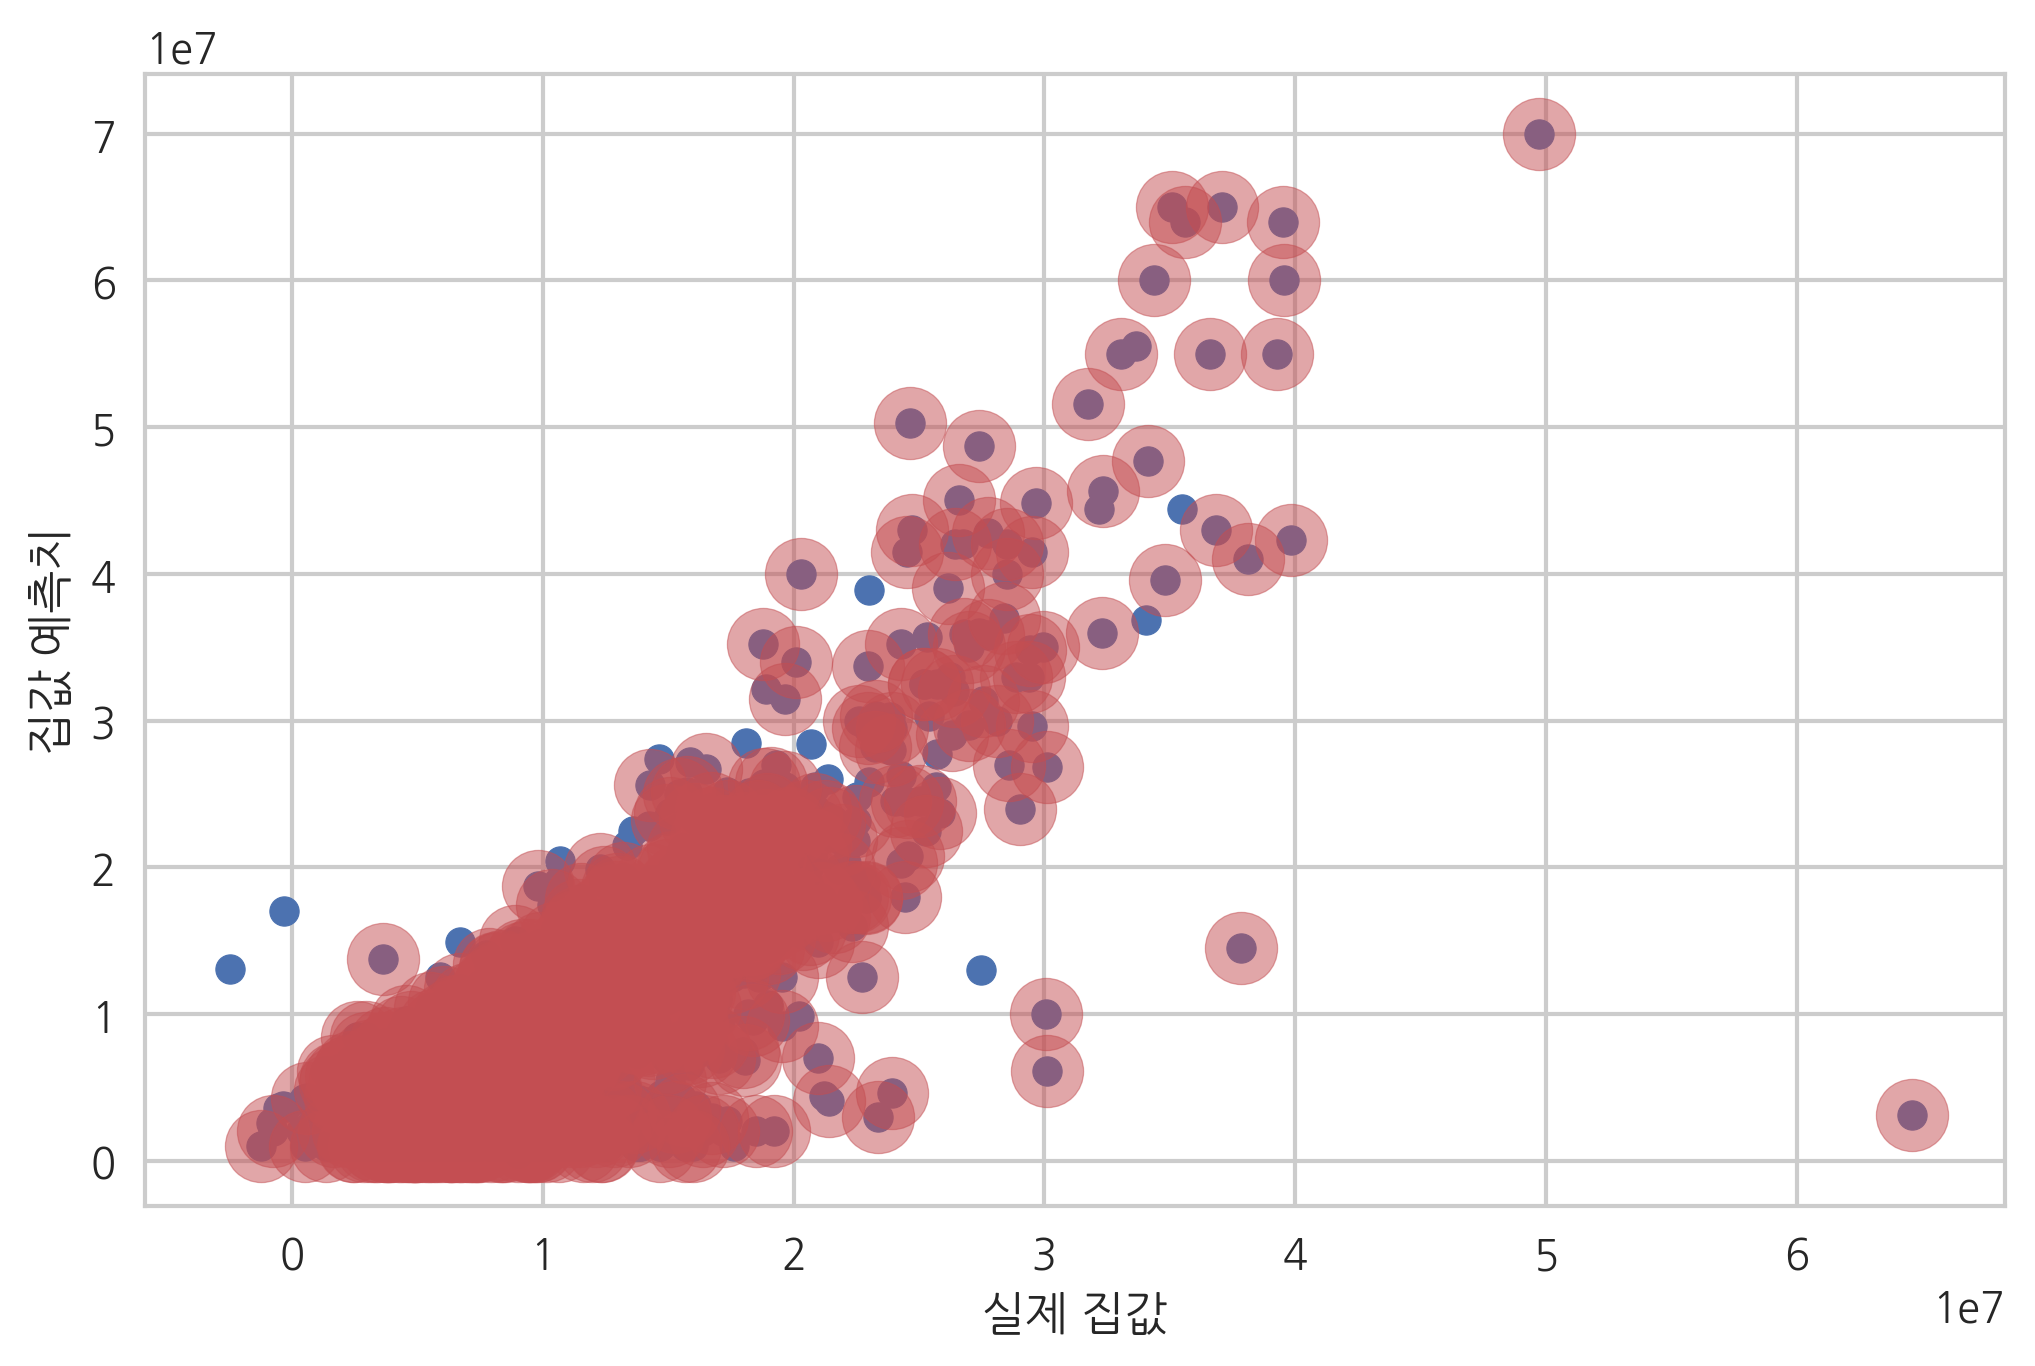

In [48]:
ax = plt.subplot()
plt.scatter(dfy_new, dfy)

idx = hat > (250/4245)
plt.scatter(dfy_new[idx], dfy[idx], s=300, c="r", alpha=0.5)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

# Outliers

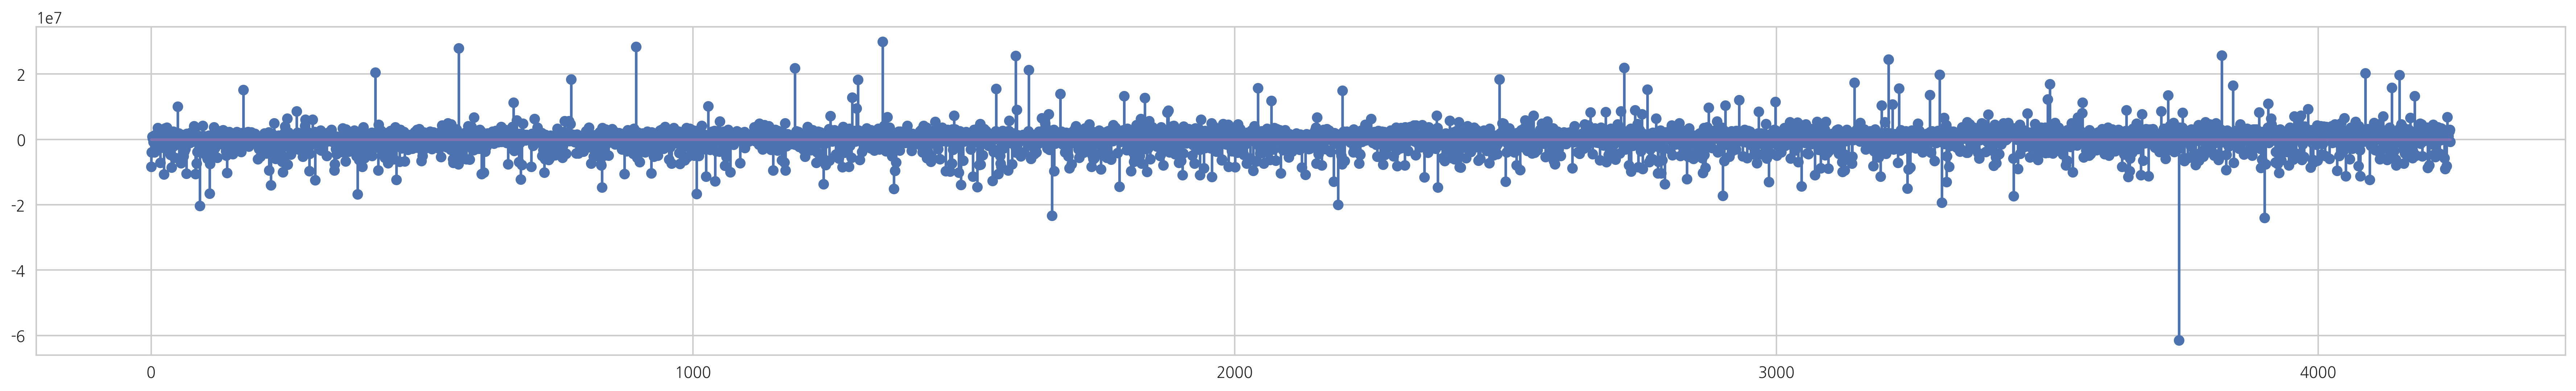

In [49]:
plt.figure(figsize=(30, 4))
plt.stem(result.resid)
plt.show()

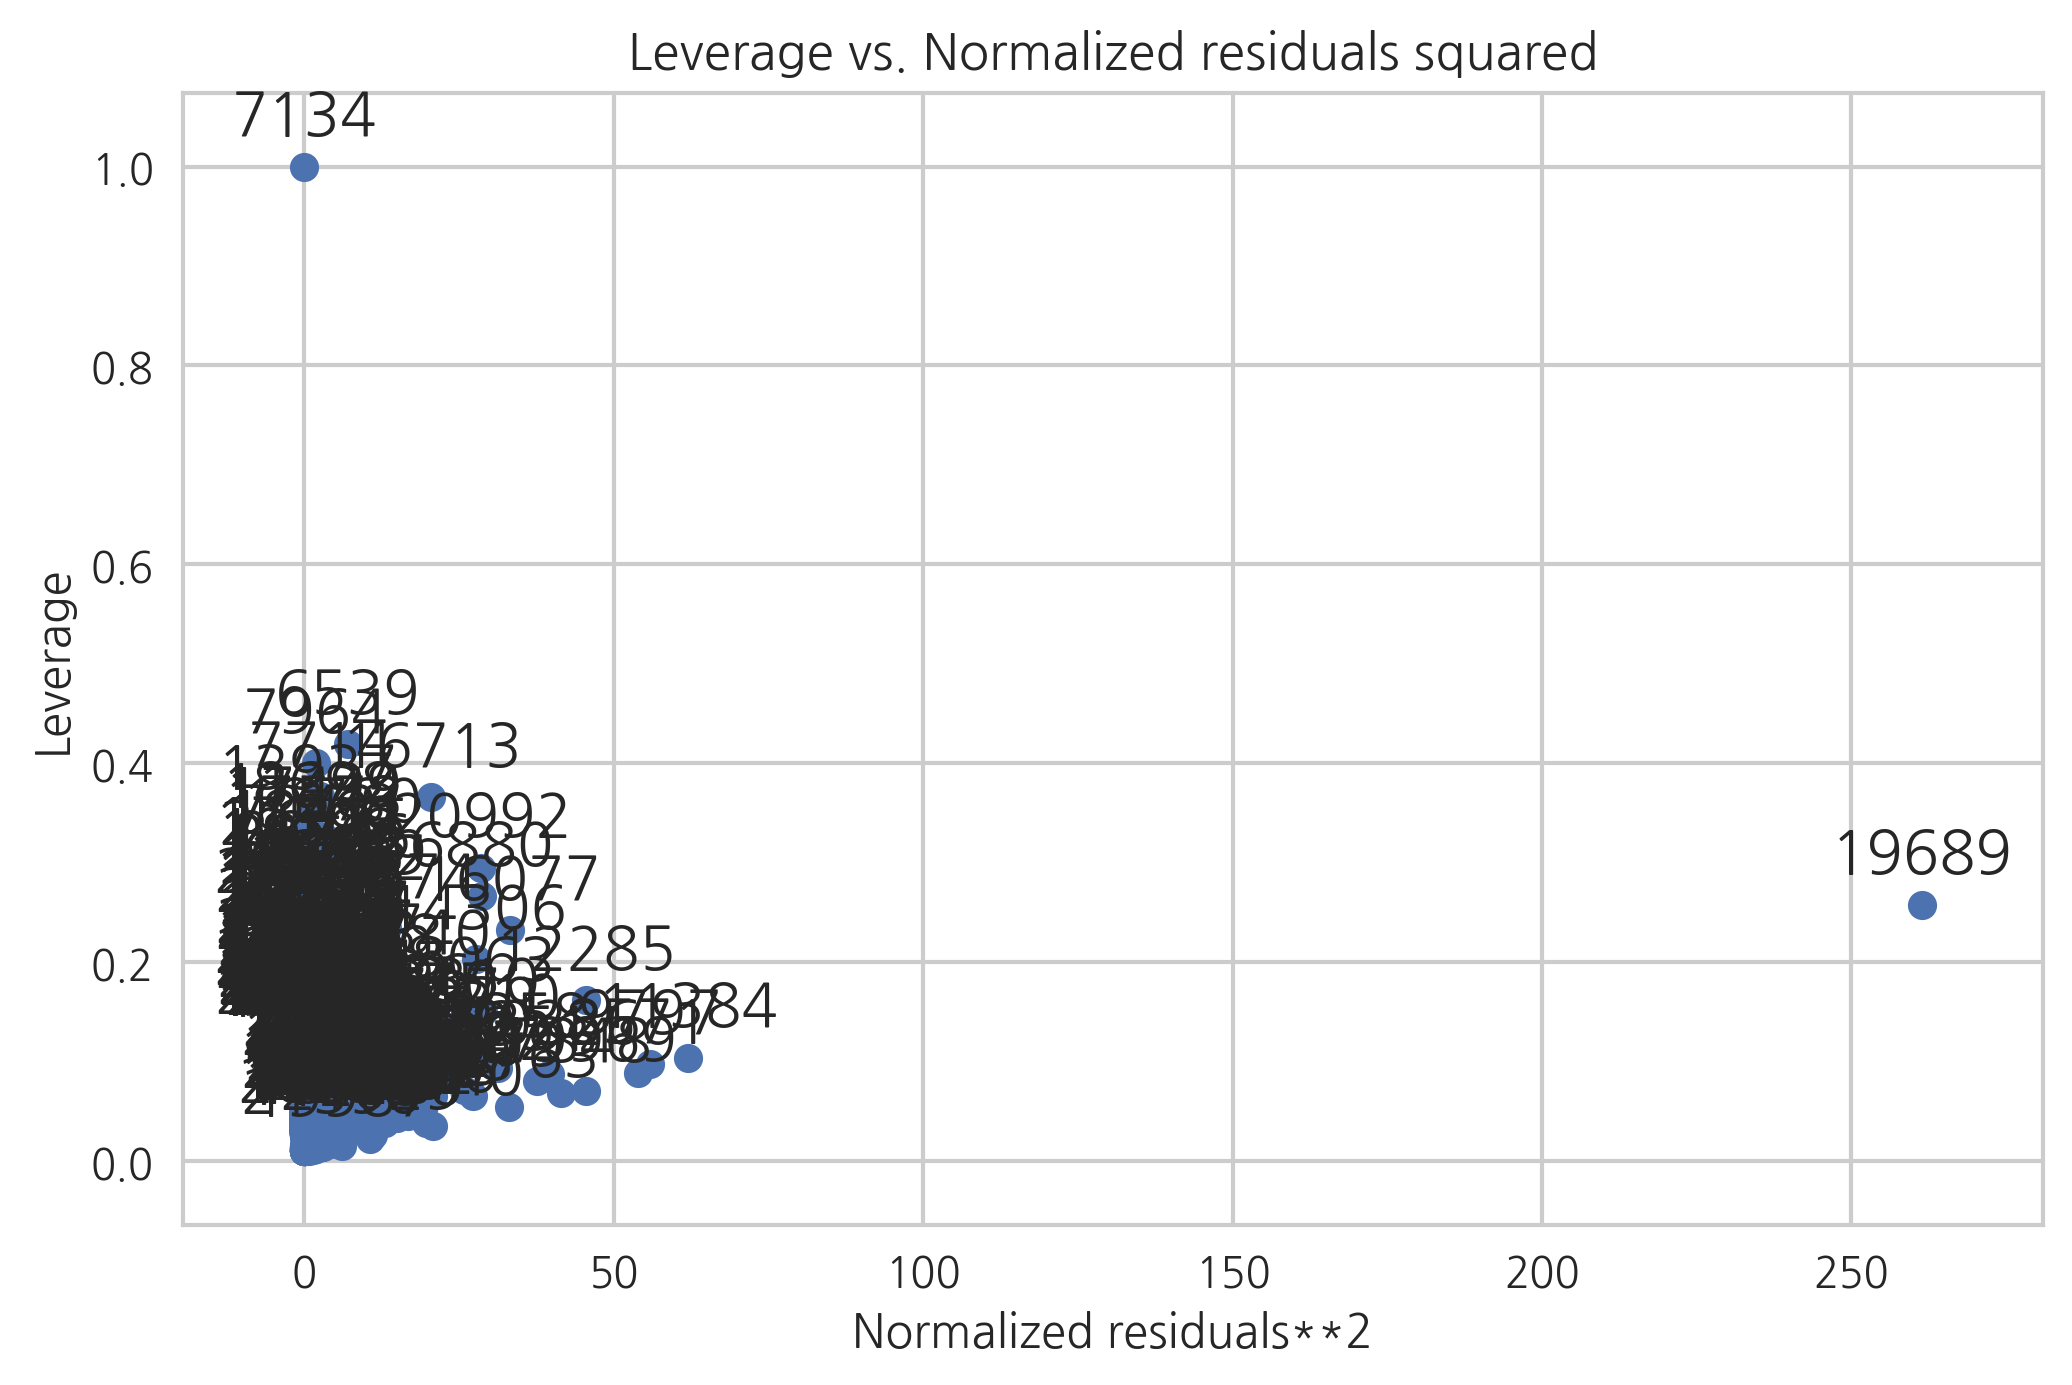

In [50]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

# Fox recommentation - Outliers

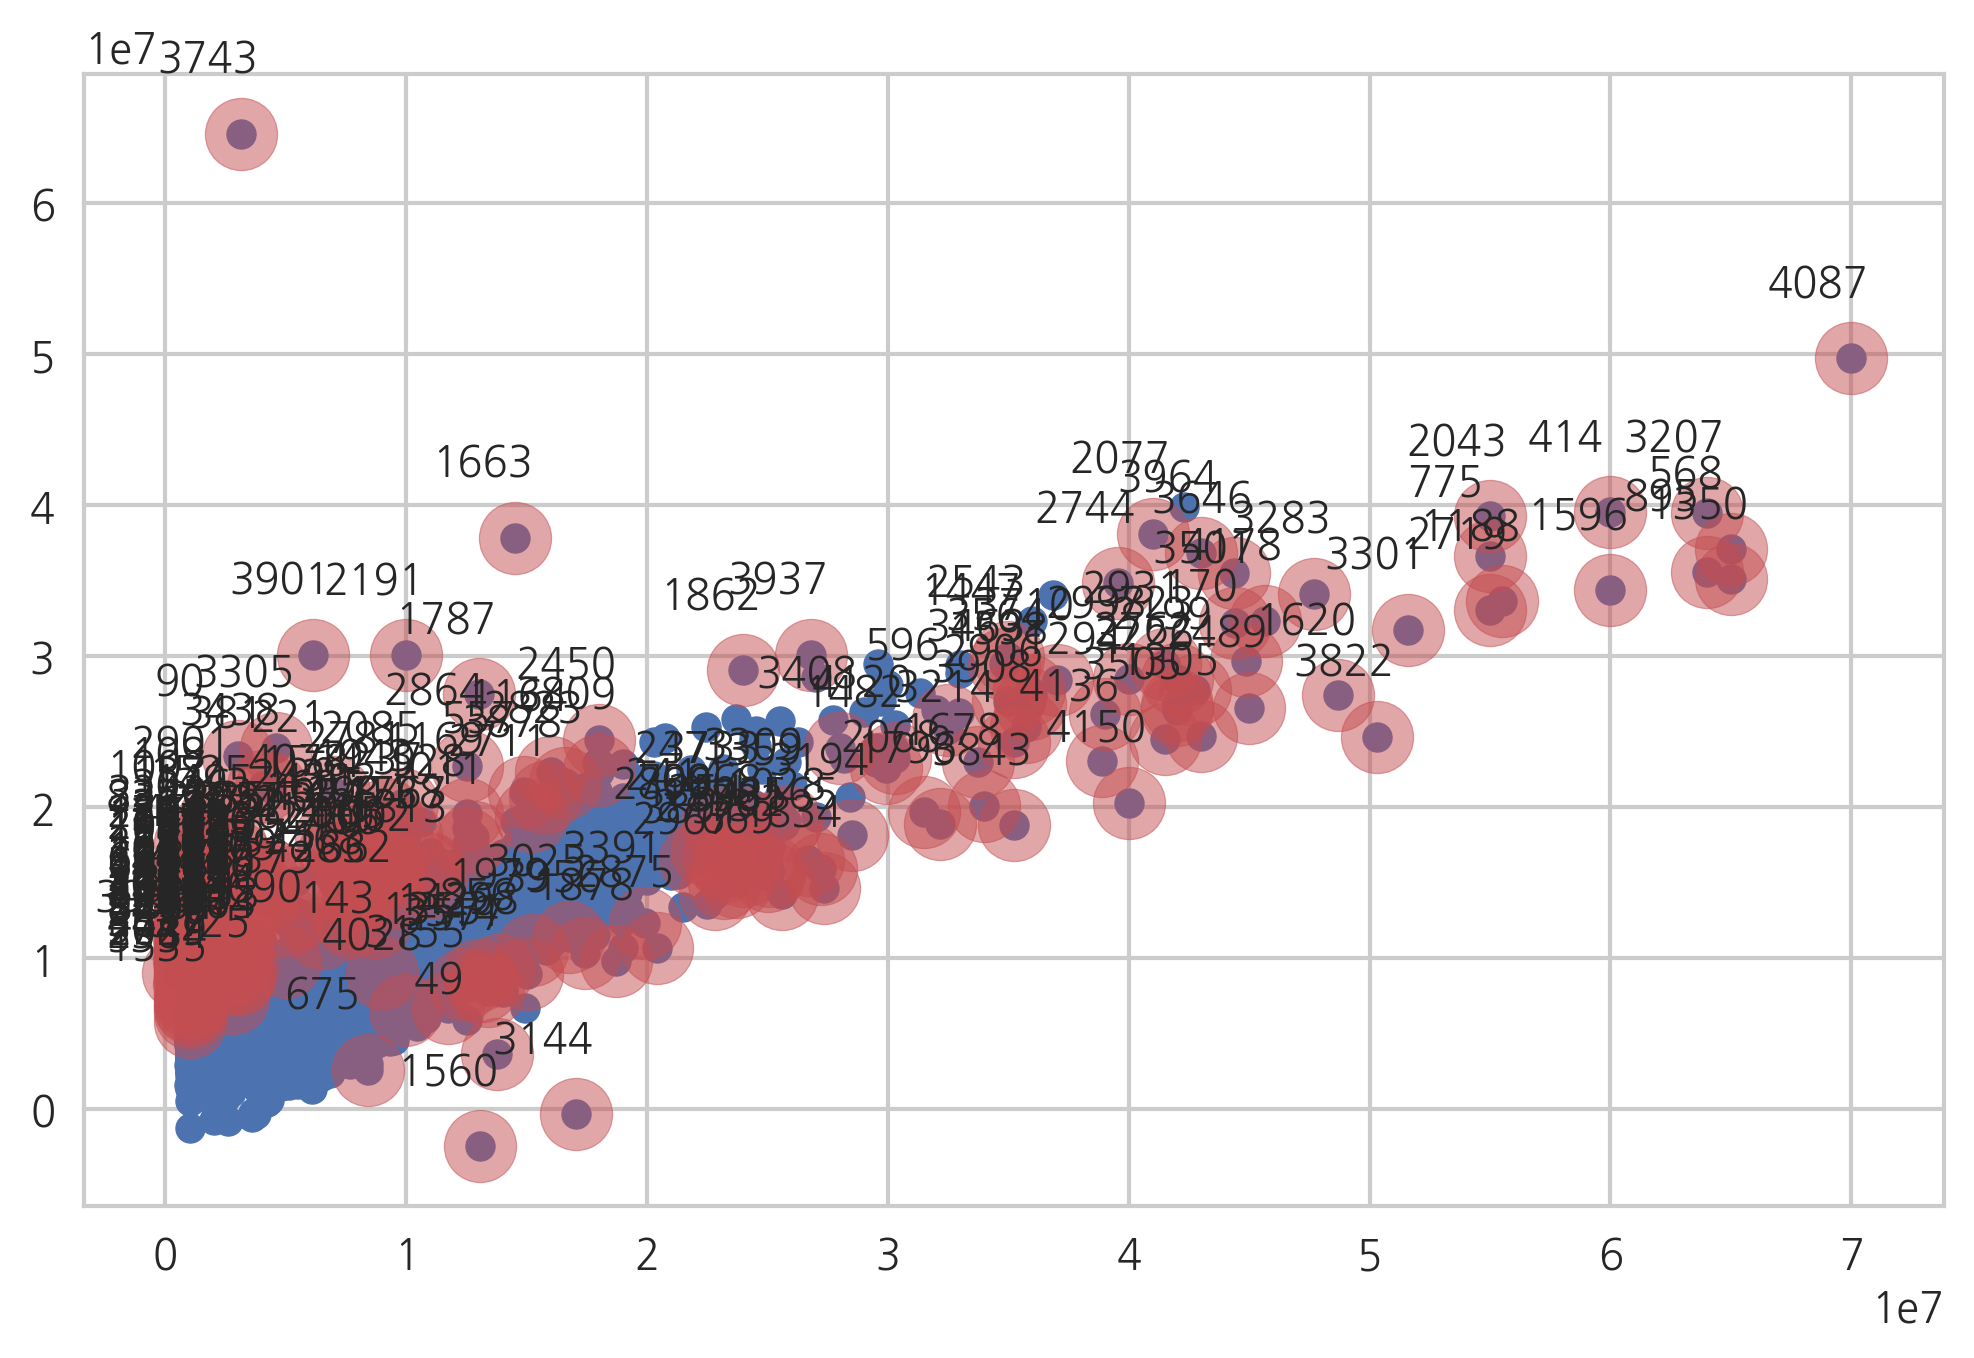

In [51]:
influence = result.get_influence()
cooks_d2, pvals = influence.cooks_distance

fox_cr = 4 / (len(dfy) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]
ax = plt.subplot()
plt.scatter(dfy, dfy_new)
plt.scatter(dfy.values[idx], dfy_new.values[idx], s=300, c="r", alpha=0.5)

from statsmodels.graphics import utils
utils.annotate_axes(range(len(idx)), idx, list(zip(dfy.values[idx].flatten(), dfy_new.values[idx].flatten())),
                    [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()

# Residual Analysis

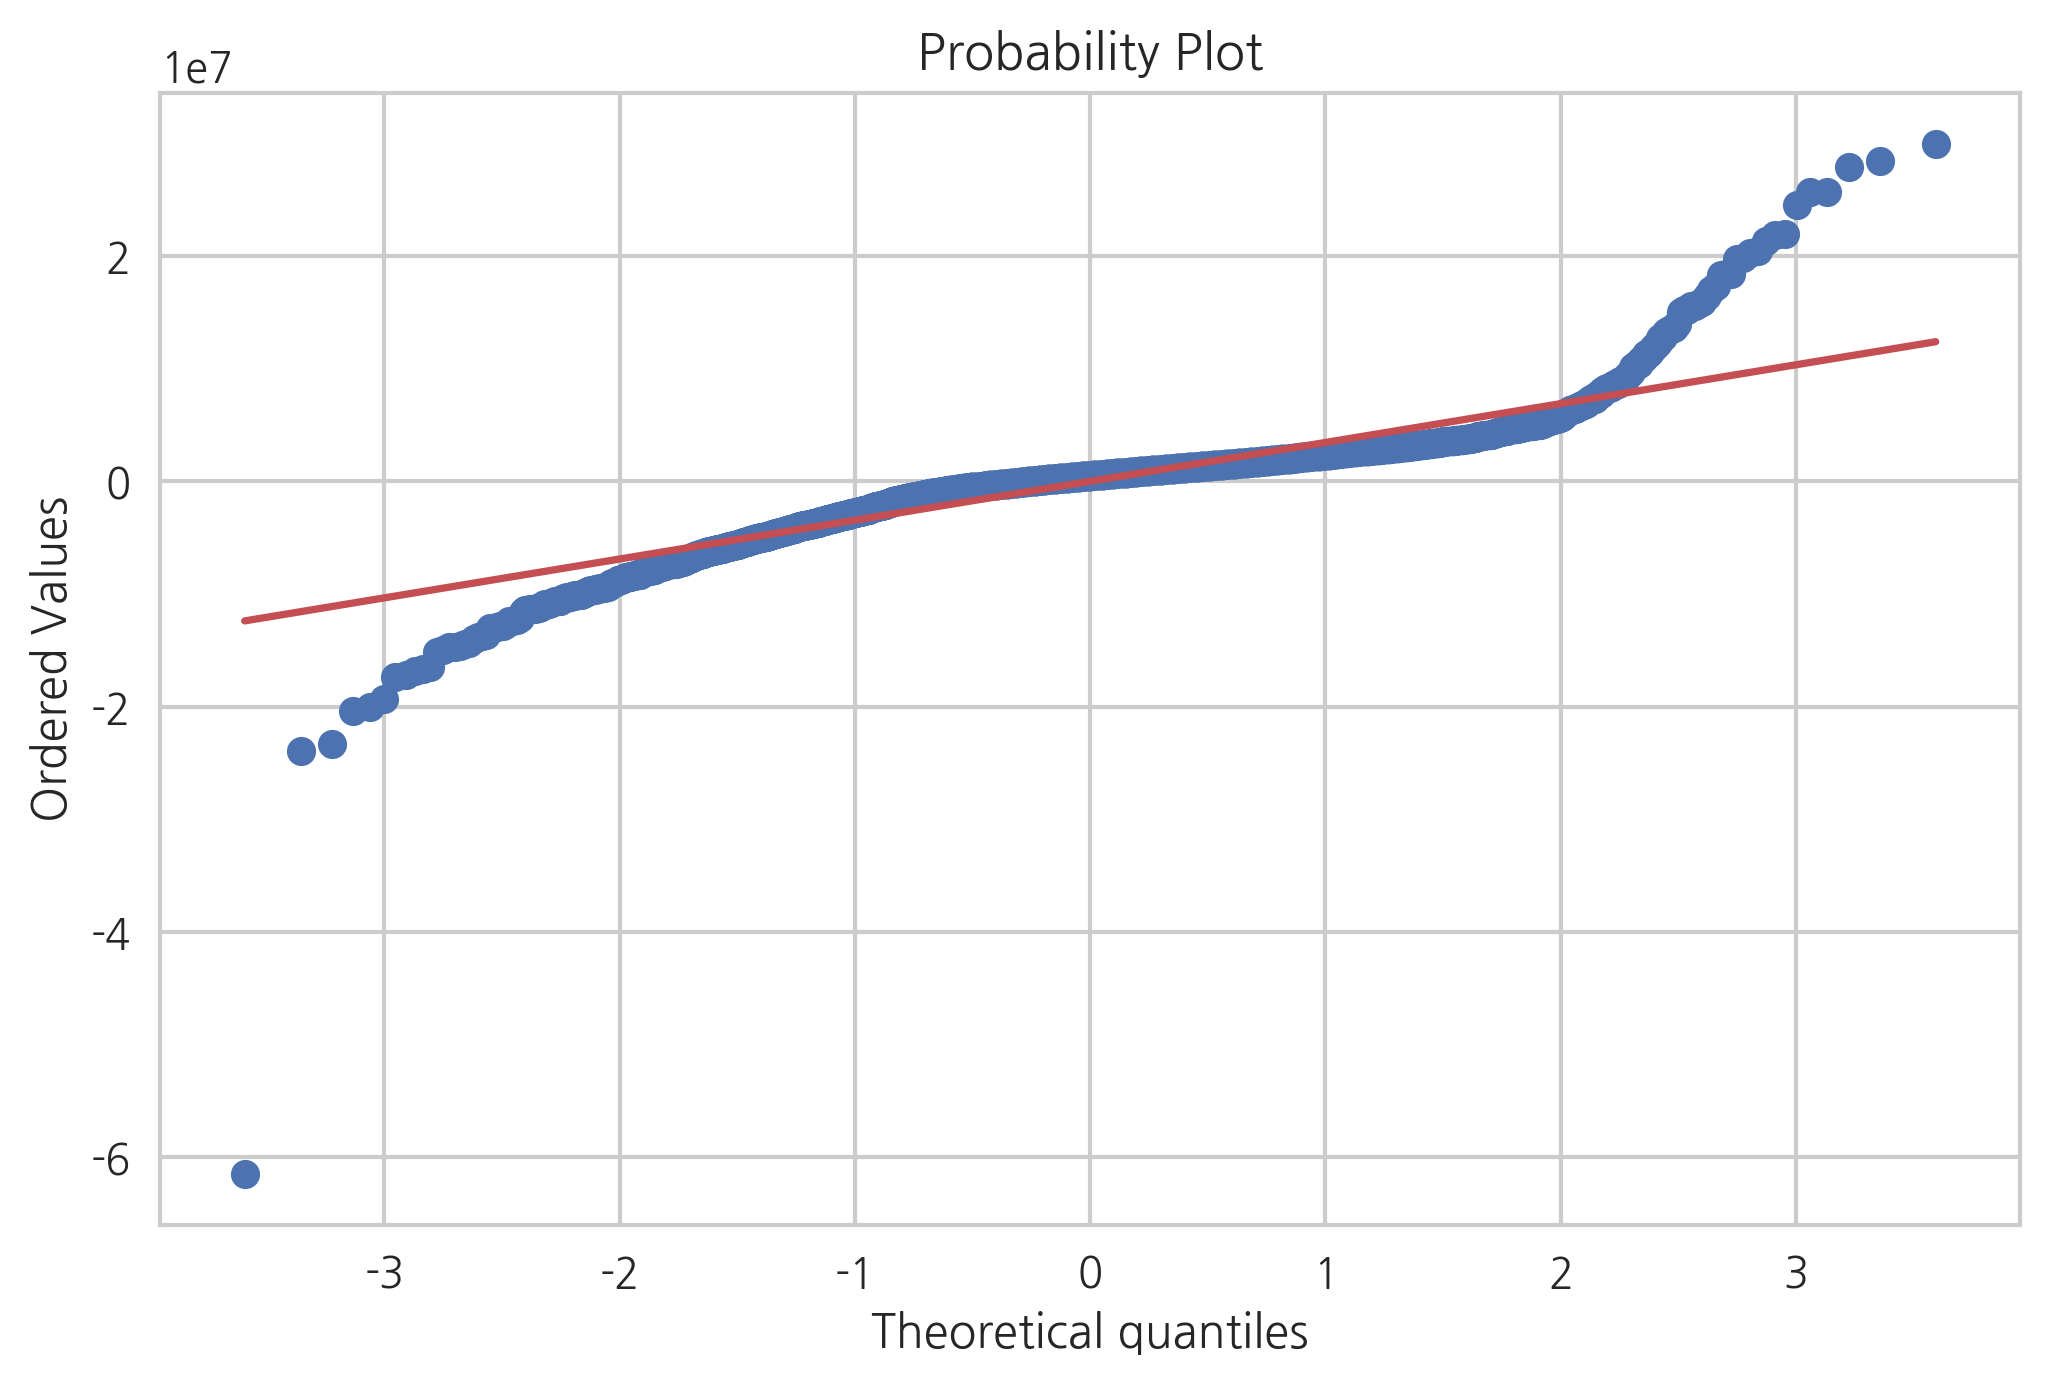

In [52]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

In [1]:
test = sms.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

NameError: name 'result' is not defined

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
print('RMSE: ', np.sqrt(mean_squared_error(dfy, dfy_new)))

RMSE:  3801011.84018


In [2]:
3900863.69204-3801011.84018

99851.85186000029

# Bootstraping

In [19]:
%%time
N = 100
params_c = np.zeros(N)
params_full_sq = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfxc2 = dfxc.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfxc2).fit()
    params_c[i] = r.params.const
    params_full_sq[i] = r.params.full_sq

CPU times: user 1min 11s, sys: 11.1 s, total: 1min 22s
Wall time: 41.2 s


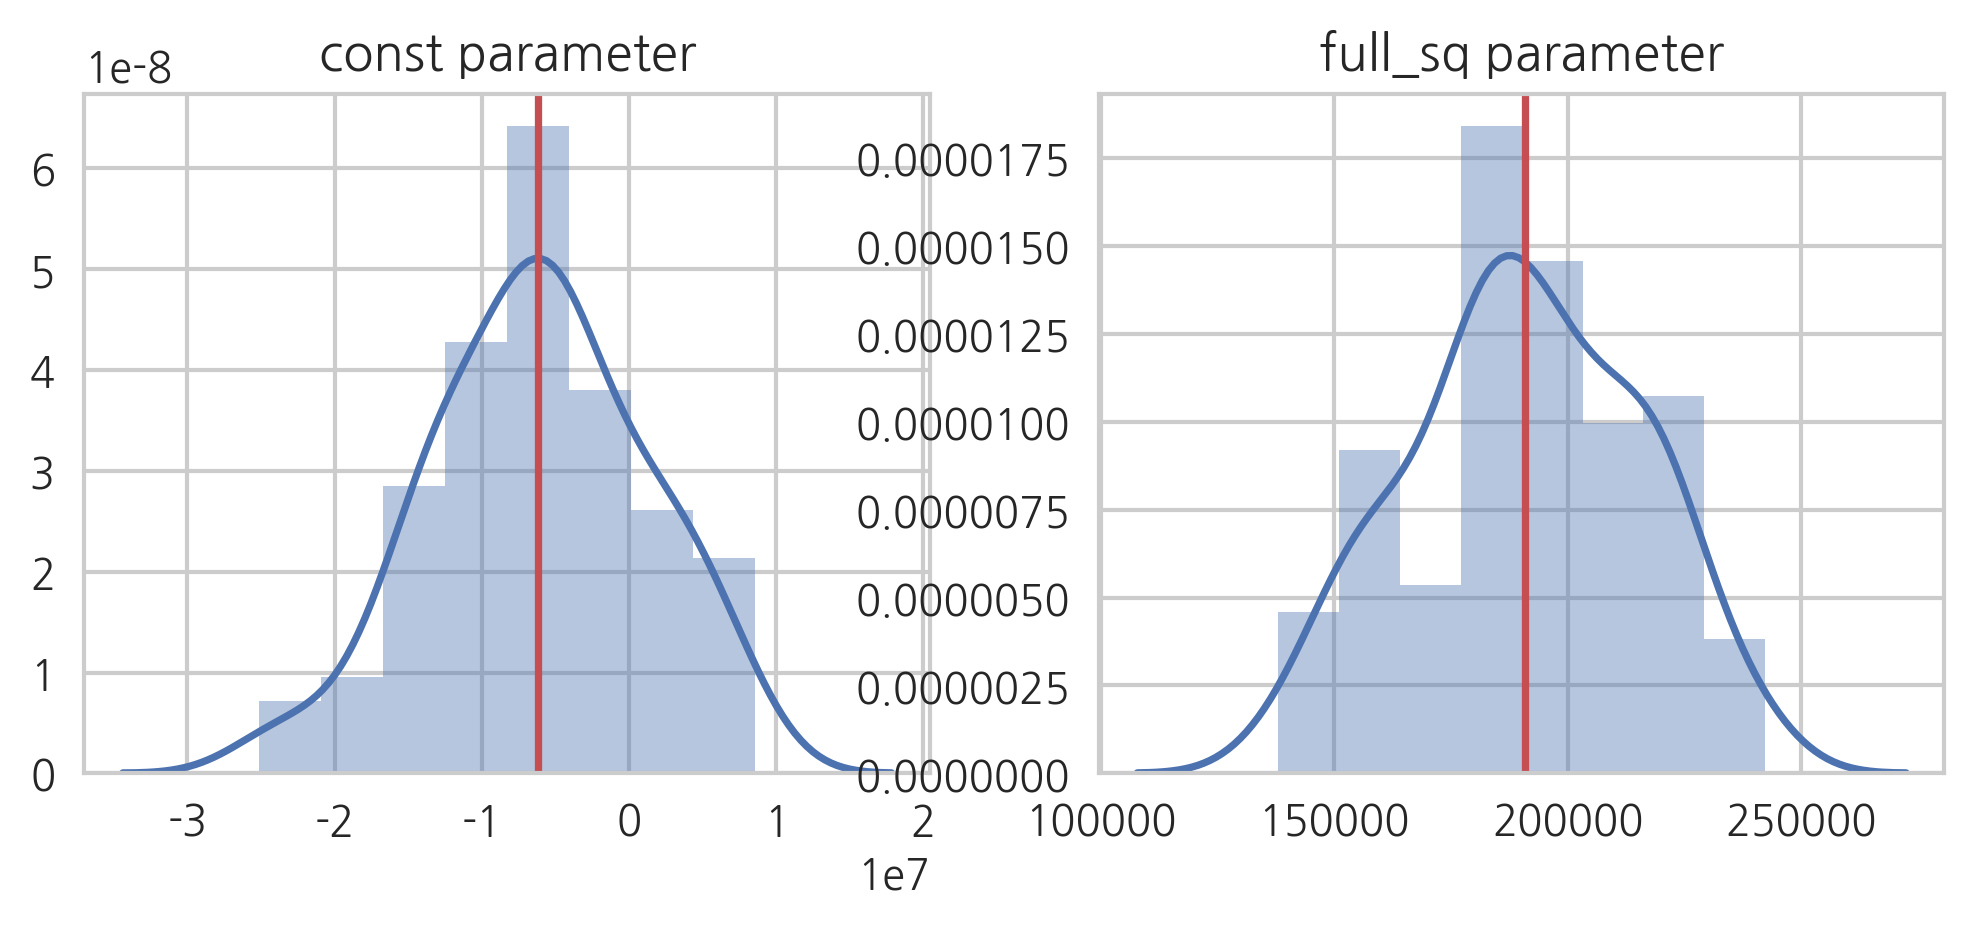

In [20]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_c, ax=ax1)
plt.axvline(params_c.mean(), c='r')
plt.title("const parameter")

ax2 = plt.subplot(122)
sns.distplot(params_full_sq, ax=ax2)
plt.axvline(params_full_sq.mean(), c='r')
plt.title("full_sq parameter")
plt.show()

In [21]:
params_c.mean(), params_c.std()

(-6189874.0978913223, 7300201.0880823517)

In [22]:
params_full_sq.mean(), params_full_sq.std()

(190847.09638425958, 24361.556221036659)

In [23]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.71
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        01:06:27   Log-Likelihood:                -70338.
No. Observations:                4245   AIC:                         1.412e+05
Df Residuals:                    4000   BIC:                         1.427e+05
Df Model:                         244                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------